# OptiDose

## Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_excel('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/Surgery summary_updated.xlsx')

In [3]:
df

,Cohort,Date of surgery,Surgeon,Animal ID,Cage,Ear Mark,Genotype,Diet,AAV,Ket dose mg/kg,...,Weight (%) Day 6,Weight (%) Day 7,Left AP,Left ML,Left DV,Left Droplet,Right AP,Right ML,Right DV,Right Droplet
0,TH3,25/02/2025,SP,51.0,15.0,RBL,WT,NCD,EV,90.0,...,0.949735,0.949735,-0.30,0.12,-0.45,0.0,-0.30,-0.12,-0.45,1.0
1,TH3,25/02/2025,SP,52.0,15.0,LBL,WT,NCD,EV,90.0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TH3,25/02/2025,LS,53.0,15.0,RLBL,WT,NCD,EV,90.0,...,0.953757,0.965318,-0.32,0.10,-0.45,1.0,-0.32,-0.12,-0.43,0.0
3,TH3,26/02/2025,LS,54.0,15.2,RRBL,WT,NCD,IDE,90.0,...,1.014493,1.011594,-0.31,0.09,-0.44,1.0,-0.32,-0.12,-0.43,1.0
4,TH3,27/02/2025,HVM,55.0,16.0,LBL,WT,NCD,EV,90.0,...,0.948649,0.951351,-0.31,0.12,-0.42,1.0,-0.31,-0.12,-0.42,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Ensure the 'Experimental Condition' column exists
df['Experimental Condition'] = df['Genotype'] + '_' + df['Diet'] + '_' + df['AAV']

# Define the desired order of experimental conditions
desired_order = [
    "WT_NCD_EV", "WT_NCD_IDE", "WT_HFD_EV", "WT_HFD_IDE",
    "Tg_NCD_EV", "Tg_NCD_IDE", "Tg_HFD_EV", "Tg_HFD_IDE"
]

df['Experimental Group'] = df['Genotype'] + '_' + df['Diet']
desired_order_group = [
    "WT_NCD", "WT_HFD",
    "Tg_NCD", "Tg_HFD"
]


In [5]:
weight_pct_cols = [col for col in df.columns if 'Weight (%)' in col]
df[weight_pct_cols] = df[weight_pct_cols].replace(0, np.nan)

## General characterization

### Duration 

In [6]:
# Function to convert time strings to total hours in float format
def time_to_hours(time_str):
    """Convert time string to float hours."""
    try:
        if pd.isna(time_str) or str(time_str).strip() in ["nan", "none", ""]:
            return np.nan

        parts = str(time_str).split(':')
        if len(parts) == 2:  # H:MM format
            h, m = map(float, parts)
            return h + m / 60
        elif len(parts) == 3:  # H:MM:SS format
            h, m, s = map(float, parts)
            return h + m / 60 + s / 3600
        else:
            return float(time_str)  # Already a number
    except:
        return np.nan

# Apply conversion function
df["Under anesthesia duration (h)"] = df["Under anesthesia duration (h)"].astype(str).apply(time_to_hours)

# Filter data based on conditions
df_filtered = df[
    (df["Fell asleep"] == 1) & 
    (df["Died during surgery"] == 0) & 
    (df["Alive after surgery"] == 1)
].copy()

# Create the 'Experimental Condition' column
df_filtered["Experimental Condition"] = df_filtered["Genotype"].astype(str) + "_" + df_filtered["Diet"].astype(str) + "_" + df_filtered["AAV"].astype(str)

# Ensure there are no NaNs in the relevant columns
df_filtered = df_filtered.dropna(subset=["Experimental Condition", "Under anesthesia duration (h)"])

# Calculate the average duration per experimental condition
anesthesia_avg = df_filtered.groupby("Experimental Condition")["Under anesthesia duration (h)"].mean().reset_index()

# Define the desired order
desired_order = [
    "WT_NCD_EV", "WT_NCD_IDE", "WT_HFD_EV", "WT_HFD_IDE",
    "Tg_NCD_EV", "Tg_NCD_IDE", "Tg_HFD_EV", "Tg_HFD_IDE"
]

# Keep only existing conditions in the correct order
anesthesia_avg = anesthesia_avg[anesthesia_avg["Experimental Condition"].isin(desired_order)]
anesthesia_avg["Experimental Condition"] = pd.Categorical(
    anesthesia_avg["Experimental Condition"], categories=desired_order, ordered=True
)
anesthesia_avg = anesthesia_avg.sort_values("Experimental Condition").reset_index(drop=True)

display(anesthesia_avg)

# Compute the overall average anesthesia duration
total_avg_duration = anesthesia_avg["Under anesthesia duration (h)"].mean()
hours = int(total_avg_duration)
minutes = int((total_avg_duration - hours) * 60)

# Print the result in hours and minutes format
print(f'The average total duration under anesthesia is: {hours}h {minutes}m')


,Experimental Condition,Under anesthesia duration (h)
0,WT_NCD_EV,2.192593
1,WT_NCD_IDE,2.278571
2,WT_HFD_EV,2.494444
3,WT_HFD_IDE,2.166667
4,Tg_NCD_EV,1.680000
5,Tg_NCD_IDE,1.903333
6,Tg_HFD_EV,2.116667
7,Tg_HFD_IDE,2.220833


The average total duration under anesthesia is: 2h 7m


### Survival

In [7]:
mean_survival = df['Alive after surgery'].mean()
print(f"Overall mean survival rate: {mean_survival:.2%}")

Overall mean survival rate: 70.83%


#### Surgeons survival score

In [8]:
import pandas as pd
import numpy as np
from IPython.display import display

# Pivot the table to have surgeons as columns and experimental conditions as rows
animal_counts_pivot = (
    df.groupby(['Experimental Condition', 'Surgeon'])['Animal ID']
    .count()
    .unstack(fill_value=0)  # Ensure missing values are filled with 0
    .reindex(desired_order) # Reorder the rows as specified
)

# Add a final column for the total number of animals per experimental condition
animal_counts_pivot["Total"] = animal_counts_pivot.sum(axis=1)

# Count the number of alive animals per experimental condition and per surgeon
alive_counts_per_surgeon = (
    df[df['Alive after surgery'] == 1].groupby(['Experimental Condition', 'Surgeon'])['Animal ID']
    .count()
    .unstack(fill_value=0)
    .reindex(desired_order, fill_value=0)
)

# Add the "Alive" column to the pivot table (total alive per condition)
animal_counts_pivot["Alive"] = alive_counts_per_surgeon.sum(axis=1)

# Calculate % survival per operator
survival_percentage_per_surgeon = round((alive_counts_per_surgeon / animal_counts_pivot.iloc[:, :-2]) * 100, 1)

# Ensure NaN survival percentages where an operator did 0 surgeries
survival_percentage_per_surgeon = survival_percentage_per_surgeon.where(animal_counts_pivot.iloc[:, :-2] != 0, np.nan)

# Merge the corrected survival percentages into the main table
for surgeon in survival_percentage_per_surgeon.columns:
    animal_counts_pivot[f"Survival % {surgeon}"] = survival_percentage_per_surgeon[surgeon]

# Recalculate overall survival % per experimental condition (rounding to 1 decimal place)
animal_counts_pivot["% Survival"] = round((animal_counts_pivot["Alive"] / animal_counts_pivot["Total"]) * 100, 1)

# Compute mean % survival per operator, ignoring NaN values
mean_survival_per_surgeon = survival_percentage_per_surgeon.mean(skipna=True).round(1)

# Count the total number of surgeries per surgeon
surgeries_per_surgeon = df['Surgeon'].value_counts()

# Display the DataFrame properly
display(animal_counts_pivot)

# Print mean % survival per surgeon and total surgeries per surgeon
print("\nMean % Survival per Surgeon (Sorted Descending):")
print(mean_survival_per_surgeon.sort_values(ascending=False))

print("\nTotal Surgeries Per Surgeon:")
print(surgeries_per_surgeon)


Surgeon,HVM,LS,RC,SP,Total,Alive,Survival % HVM,Survival % LS,Survival % RC,Survival % SP,% Survival
Experimental Condition,,,,,,,,,,,
WT_NCD_EV,5,2,0,4,11,9,80.0,100.0,NaN,75.0,81.8
WT_NCD_IDE,2,6,0,0,8,7,100.0,83.3,NaN,NaN,87.5
WT_HFD_EV,1,1,0,5,7,6,0.0,100.0,NaN,100.0,85.7
WT_HFD_IDE,2,2,0,5,9,5,50.0,50.0,NaN,60.0,55.6
Tg_NCD_EV,12,4,1,0,17,10,58.3,50.0,100.0,NaN,58.8
Tg_NCD_IDE,7,1,0,1,9,5,71.4,0.0,NaN,0.0,55.6
Tg_HFD_EV,3,3,0,1,7,5,66.7,66.7,NaN,100.0,71.4
Tg_HFD_IDE,2,0,0,2,4,4,100.0,NaN,NaN,100.0,100.0



Mean % Survival per Surgeon (Sorted Descending):
Surgeon
RC     100.0
SP      72.5
HVM     65.8
LS      64.3
dtype: float64

Total Surgeries Per Surgeon:
Surgeon
HVM    34
LS     19
SP     18
RC      1
Name: count, dtype: int64


#### Experimental group survival

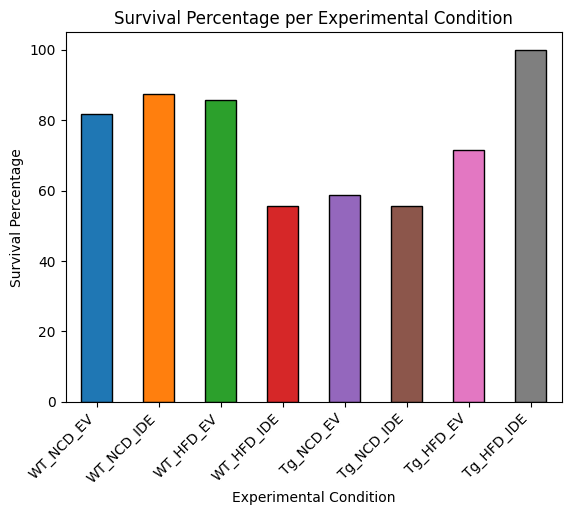

In [9]:
# Step 2: Plot survival percentage per Experimental Condition using tab10 palette and desired order
desired_order = [
    "WT_NCD_EV", "WT_NCD_IDE", "WT_HFD_EV", "WT_HFD_IDE",
    "Tg_NCD_EV", "Tg_NCD_IDE", "Tg_HFD_EV", "Tg_HFD_IDE"
]
colors = sns.color_palette("tab10", len(desired_order))

total_counts = df.groupby('Experimental Condition')['Alive after surgery'].count()
survival_counts = df.groupby('Experimental Condition')['Alive after surgery'].sum()
survival_percentage = (survival_counts / total_counts * 100).reindex(desired_order)

survival_percentage.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Experimental Condition')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage per Experimental Condition')
plt.xticks(rotation=45, ha='right')
plt.show()

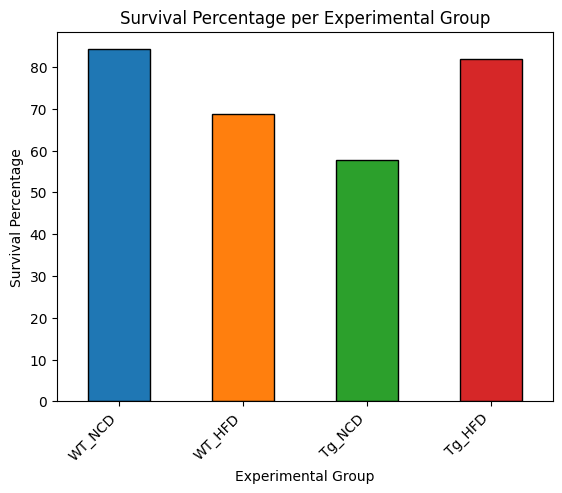

In [10]:
# Step 2: Plot survival percentage per Experimental Condition using tab10 palette and desired order

colors = sns.color_palette("tab10", len(desired_order))

total_counts = df.groupby('Experimental Group')['Alive after surgery'].count()
survival_counts = df.groupby('Experimental Group')['Alive after surgery'].sum()
survival_percentage = (survival_counts / total_counts * 100).reindex(desired_order_group)

survival_percentage.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Experimental Group')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage per Experimental Group')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Survival over time

Total animals: 72
Number of unique surgery days: 15
Surgery days: 1 to 15

WT NCD: 19 animals

WT HFD: 16 animals

Tg NCD: 26 animals

Tg HFD: 11 animals

✓ Figure saved as 'survival_analysis.png'


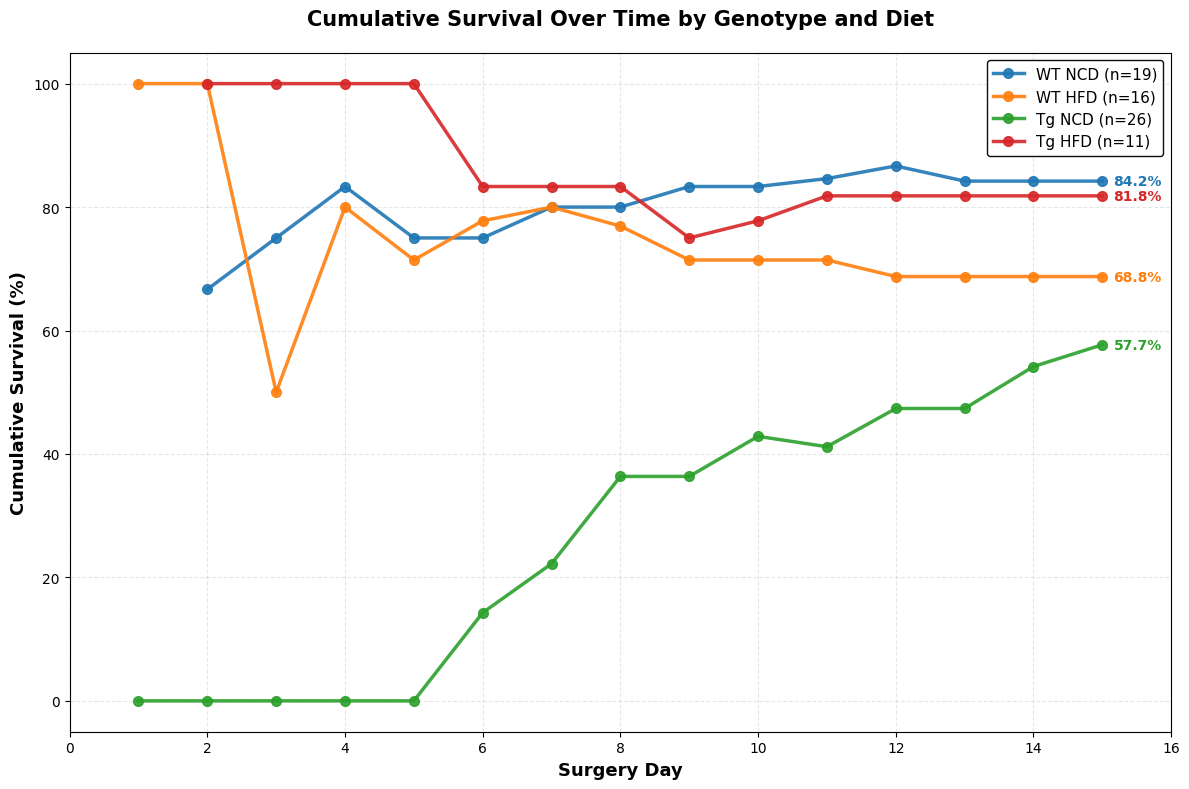

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Read the Excel file
df = pd.read_excel('Surgery summary_updated.xlsx')

# Filter out rows without genotype or diet information
df_clean = df[df['Genotype'].notna() & df['Diet'].notna()].copy()

# Parse surgery dates
df_clean['Date of surgery'] = pd.to_datetime(df_clean['Date of surgery'], format='%d/%m/%Y')

# Get unique surgery dates and create a mapping to sequential day numbers
unique_dates = sorted(df_clean['Date of surgery'].unique())
date_to_day = {date: i+1 for i, date in enumerate(unique_dates)}

# Convert dates to sequential surgery days (Day 1, Day 2, Day 3, etc.)
df_clean['Surgery Day'] = df_clean['Date of surgery'].map(date_to_day)

print(f"Total animals: {len(df_clean)}")
print(f"Number of unique surgery days: {len(unique_dates)}")
print(f"Surgery days: 1 to {len(unique_dates)}")

# Create groups
groups = {
    'WT NCD': (df_clean['Genotype'] == 'WT') & (df_clean['Diet'] == 'NCD'),
    'WT HFD': (df_clean['Genotype'] == 'WT') & (df_clean['Diet'] == 'HFD'),
    'Tg NCD': (df_clean['Genotype'] == 'Tg') & (df_clean['Diet'] == 'NCD'),
    'Tg HFD': (df_clean['Genotype'] == 'Tg') & (df_clean['Diet'] == 'HFD')
}

# Color mapping using tab10
colors = {
    'WT NCD': '#1f77b4',  # blue
    'WT HFD': '#ff7f0e',  # orange
    'Tg NCD': '#2ca02c',  # green
    'Tg HFD': '#d62728'   # red
}

# Calculate survival for each group
survival_data = {}

for group_name, group_mask in groups.items():
    group_df = df_clean[group_mask].copy()
    n_total = len(group_df)
    
    if n_total == 0:
        continue
    
    print(f"\n{group_name}: {n_total} animals")
    
    days = []
    survival_rates = []
    
    # For each unique surgery day, calculate cumulative survival
    for day in range(1, len(unique_dates) + 1):
        # Count animals that had surgery on or before this day AND are alive
        animals_by_this_day = group_df[group_df['Surgery Day'] <= day]
        n_operated = len(animals_by_this_day)
        
        if n_operated > 0:
            n_alive = animals_by_this_day['Alive after surgery'].sum()
            survival_rate = n_alive / n_operated * 100
            
            days.append(day)
            survival_rates.append(survival_rate)
    
    survival_data[group_name] = {
        'days': days,
        'survival': survival_rates,
        'n': n_total
    }

# Create the plot
plt.figure(figsize=(12, 8))

for group_name, data in survival_data.items():
    if len(data['days']) > 0:
        plt.plot(data['days'], data['survival'], 
                marker='o', 
                linewidth=2.5, 
                markersize=7,
                label=f"{group_name} (n={data['n']})",
                color=colors[group_name],
                alpha=0.9)
        
        # Add label to the last point
        last_day = data['days'][-1]
        last_survival = data['survival'][-1]
        plt.annotate(f'{last_survival:.1f}%', 
                    xy=(last_day, last_survival),
                    xytext=(8, 0), 
                    textcoords='offset points',
                    fontsize=10,
                    fontweight='bold',
                    color=colors[group_name],
                    va='center')

plt.xlabel('Surgery Day', fontsize=13, fontweight='bold')
plt.ylabel('Cumulative Survival (%)', fontsize=13, fontweight='bold')
plt.title('Cumulative Survival Over Time by Genotype and Diet', fontsize=15, fontweight='bold', pad=20)
plt.xlim(0, len(unique_dates) + 1)
plt.ylim(-5, 105)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='best', framealpha=0.95, fontsize=11, edgecolor='black')
plt.tight_layout()

# Save the figure
plt.savefig('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/survival_analysis.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Figure saved as 'survival_analysis.png'")
plt.show()

### Weight distribution

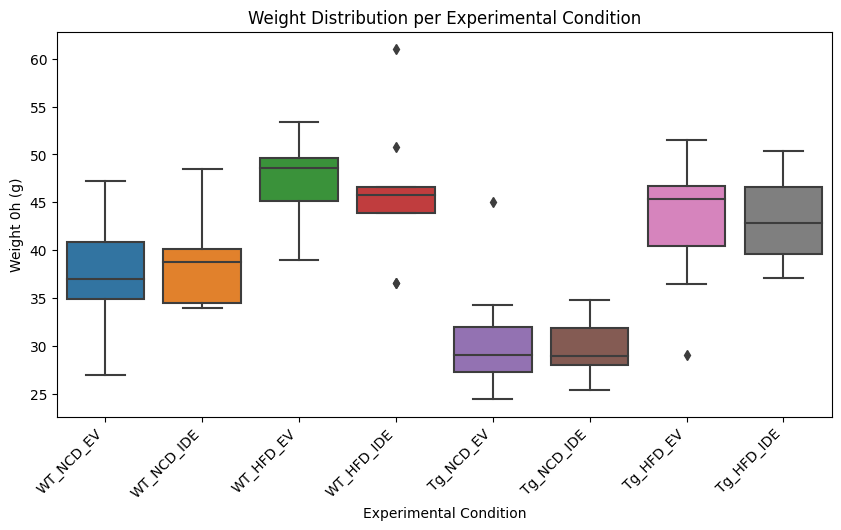

In [11]:
# Step 3: Plot weight per Experimental Condition
plt.figure(figsize=(10, 5))
sns.boxplot(x='Experimental Condition', y='Weight 0h', data=df, order=desired_order, palette='tab10')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Experimental Condition')
plt.ylabel('Weight 0h (g)')
plt.title('Weight Distribution per Experimental Condition')
plt.show()

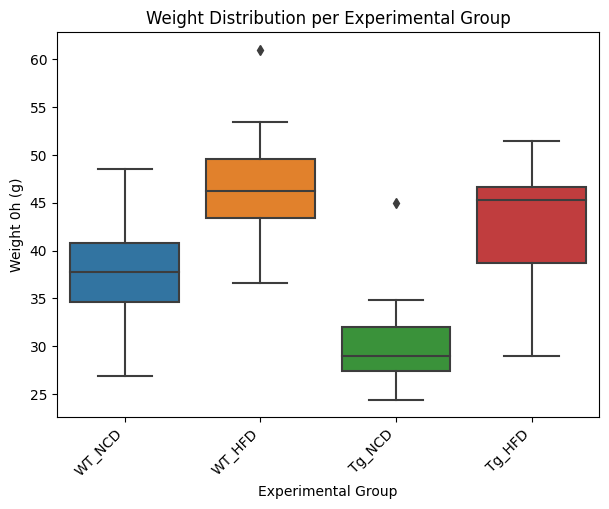

In [12]:
# Step 3: Plot weight per Experimental Condition
plt.figure(figsize=(7, 5))
sns.boxplot(x='Experimental Group', y='Weight 0h', data=df, order=desired_order_group, palette='tab10')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Experimental Group')
plt.ylabel('Weight 0h (g)')
plt.title('Weight Distribution per Experimental Group')
plt.show()

## Anesthesia Dose (%) vs Weight

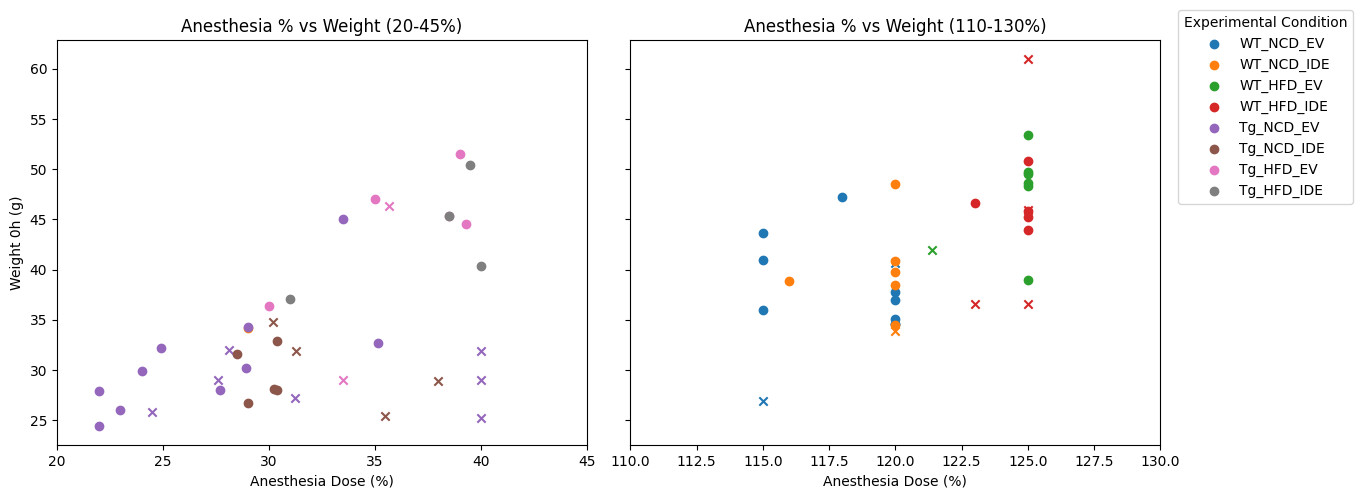

In [13]:
# Ensure 'Alive after surgery' is a boolean column
df['Alive after surgery'] = df['Alive after surgery'].astype(bool)


fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
colors = sns.color_palette("tab10", n_colors=len(desired_order))
color_dict = dict(zip(desired_order, colors))

# Define x-ranges
ranges = [(20, 45), (110, 130)]
handles_dict = {}

for ax, (x_min, x_max) in zip(axes, ranges):
    for condition in desired_order:
        subset = df[(df['Experimental Condition'] == condition) &
                    (df['Anesthesia dose percentage from working dilution'].between(x_min, x_max))]
        
        if not subset.empty:
            alive_subset = subset[subset['Alive after surgery'] == True]
            dead_subset = subset[subset['Alive after surgery'] == False]
            
            sc_alive = ax.scatter(alive_subset['Anesthesia dose percentage from working dilution'],
                                  alive_subset['Weight 0h'],
                                  color=color_dict.get(condition, 'black'),
                                  marker='o', label=condition if condition not in handles_dict else "")
            
            sc_dead = ax.scatter(dead_subset['Anesthesia dose percentage from working dilution'],
                                  dead_subset['Weight 0h'],
                                  color=color_dict.get(condition, 'black'),
                                  marker='x', label=condition if condition not in handles_dict else "")
            
            if condition not in handles_dict:
                handles_dict[condition] = sc_alive
    
    ax.set_xlim(x_min, x_max)
    ax.set_xlabel('Anesthesia Dose (%)')
    ax.set_title(f'Anesthesia % vs Weight ({x_min}-{x_max}%)')

axes[0].set_ylabel('Weight 0h (g)')
fig.legend(handles=[handles_dict[cond] for cond in desired_order if cond in handles_dict],
           labels=[cond for cond in desired_order if cond in handles_dict],
           title='Experimental Condition', bbox_to_anchor=(0.98, 1), loc='upper left')
plt.savefig('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/anesthesia vs weight_oct2025.png')
plt.tight_layout()
plt.show()

## Bivariate Log regression on Survival per Anesthesia Dose (%) vs Weight

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D 

### WT NCD

DIAGNOSTIC INFORMATION

Total animals in subset: 17
Alive: 15
Dead: 2
Survival rate: 88.2%

Animals included in analysis:
  ID 51.0: ALIVE - Weight:37.8g, Anesthesia:120.00%
  ID 52.0: DEAD - Weight:40.7g, Anesthesia:120.00%
  ID 53.0: ALIVE - Weight:34.6g, Anesthesia:120.00%
  ID 54.0: ALIVE - Weight:34.5g, Anesthesia:120.00%
  ID 55.0: ALIVE - Weight:37.0g, Anesthesia:120.00%
  ID 56.0: ALIVE - Weight:34.6g, Anesthesia:120.00%
  ID 57.0: ALIVE - Weight:40.9g, Anesthesia:120.00%
  ID 58.0: DEAD - Weight:33.9g, Anesthesia:120.00%
  ID 59.0: ALIVE - Weight:38.5g, Anesthesia:120.00%
  ID 60.0: ALIVE - Weight:48.5g, Anesthesia:120.00%
  ID 76.0: ALIVE - Weight:35.1g, Anesthesia:120.00%
  ID 86.0: ALIVE - Weight:39.8g, Anesthesia:120.00%
  ID 101.0: ALIVE - Weight:38.9g, Anesthesia:116.00%
  ID 102.0: ALIVE - Weight:47.2g, Anesthesia:118.00%
  ID 502.0: ALIVE - Weight:43.6g, Anesthesia:115.00%
  ID 490.0: ALIVE - Weight:36.0g, Anesthesia:115.00%
  ID 503.0: ALIVE - Weight:41.0g, Anesthesia

/Users/louis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


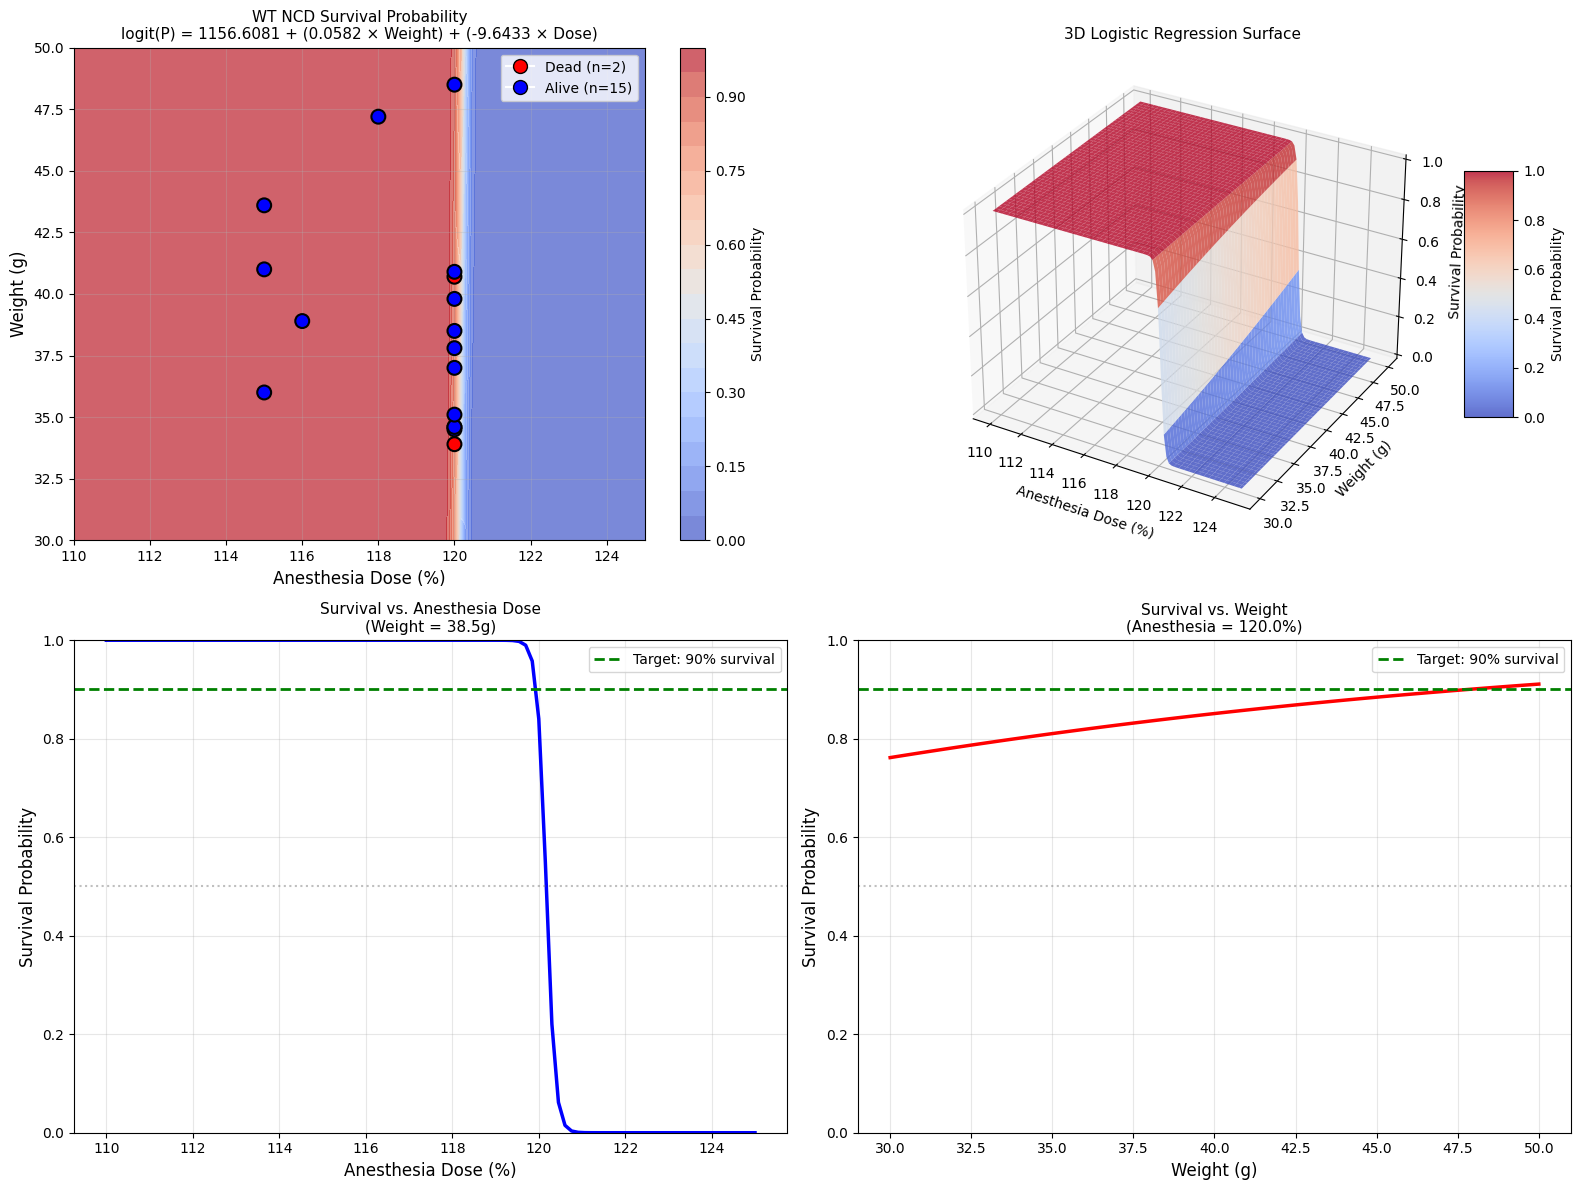


✓ Plot saved successfully!


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Filter data for WT NCD
subset = df[(df['Genotype'].isin(["WT"])) & (df['Diet'] == "NCD") &
                    (df['Anesthesia dose percentage from working dilution'].between(110, 125)) &
                    (df['Weight 0h'].between(30, 50)) &
                    (df['Alive after surgery'].notna())]

# DIAGNOSTIC CHECKS
print("=" * 60)
print("DIAGNOSTIC INFORMATION")
print("=" * 60)
print(f"\nTotal animals in subset: {len(subset)}")
alive_count = (subset['Alive after surgery'] == 1).sum()
dead_count = (subset['Alive after surgery'] == 0).sum()
print(f"Alive: {alive_count}")
print(f"Dead: {dead_count}")
print(f"Survival rate: {alive_count / len(subset) * 100:.1f}%")

# Show which animals are included
print("\nAnimals included in analysis:")
for idx, row in subset.iterrows():
    status = "ALIVE" if row['Alive after surgery'] == 1 else "DEAD"
    print(f"  ID {row['Animal ID']}: {status} - Weight:{row['Weight 0h']:.1f}g, Anesthesia:{row['Anesthesia dose percentage from working dilution']:.2f}%")

# Summary statistics by outcome
print("\n--- Dead animals ---")
dead_animals = subset[subset['Alive after surgery'] == 0]
print(f"Count: {len(dead_animals)}")
if len(dead_animals) > 0:
    print(f"Weight: {dead_animals['Weight 0h'].mean():.1f}g ± {dead_animals['Weight 0h'].std():.1f} (range: {dead_animals['Weight 0h'].min():.1f}-{dead_animals['Weight 0h'].max():.1f})")
    print(f"Anesthesia: {dead_animals['Anesthesia dose percentage from working dilution'].mean():.1f}% ± {dead_animals['Anesthesia dose percentage from working dilution'].std():.1f} (range: {dead_animals['Anesthesia dose percentage from working dilution'].min():.2f}-{dead_animals['Anesthesia dose percentage from working dilution'].max():.1f})")

print("\n--- Alive animals ---")
alive_animals = subset[subset['Alive after surgery'] == 1]
print(f"Count: {len(alive_animals)}")
if len(alive_animals) > 0:
    print(f"Weight: {alive_animals['Weight 0h'].mean():.1f}g ± {alive_animals['Weight 0h'].std():.1f} (range: {alive_animals['Weight 0h'].min():.1f}-{alive_animals['Weight 0h'].max():.1f})")
    print(f"Anesthesia: {alive_animals['Anesthesia dose percentage from working dilution'].mean():.1f}% ± {alive_animals['Anesthesia dose percentage from working dilution'].std():.1f} (range: {alive_animals['Anesthesia dose percentage from working dilution'].min():.1f}-{alive_animals['Anesthesia dose percentage from working dilution'].max():.1f})")

print("\n" + "=" * 60)

# Step 2: Prepare data for logistic regression
X_logistic = subset[['Weight 0h', 'Anesthesia dose percentage from working dilution']]
y_logistic = subset['Alive after surgery'].astype(int)
X_logistic = sm.add_constant(X_logistic)

# Step 3: Fit logistic regression model
logistic_model = sm.Logit(y_logistic, X_logistic).fit()

# Print model summary
print("\nLOGISTIC REGRESSION MODEL SUMMARY")
print("=" * 60)
print(logistic_model.summary())

# Print logistic regression equation
intercept = logistic_model.params['const']
coef_weight = logistic_model.params['Weight 0h']
coef_dose = logistic_model.params['Anesthesia dose percentage from working dilution']

print("\n" + "=" * 60)
print(f"Logistic equation: logit(P) = {intercept:.4f} + ({coef_weight:.4f} * Weight) + ({coef_dose:.4f} * Anesthesia)")
print(f"Equation for Dose Calculation: Anesthesia = (logit(0.9) - ({intercept:.4f}) - ({coef_weight:.4f} * Weight)) / ({coef_dose:.4f})")
print("=" * 60)

# Check coefficient significance
print("\n--- Coefficient Significance ---")
for var in logistic_model.pvalues.index:
    p_val = logistic_model.pvalues[var]
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "n.s."
    print(f"{var}: β={logistic_model.params[var]:.4f}, p={p_val:.4f} {sig}")

# Create equation for title
equation_title = f"logit(P) = {intercept:.4f} + ({coef_weight:.4f} × Weight) + ({coef_dose:.4f} × Dose)"

# Step 4: Create a range of weights and anesthesia doses for prediction
dose_range = np.linspace(110, 125, 100)
weight_range = np.linspace(30, 50, 50)
D, W = np.meshgrid(dose_range, weight_range)

# Step 5: Generate prediction data
grid_data = pd.DataFrame({
    'Weight 0h': W.ravel(), 
    'Anesthesia dose percentage from working dilution': D.ravel()
})
grid_data = sm.add_constant(grid_data)

# Predict survival probability
predicted_probs = logistic_model.predict(grid_data).values.reshape(D.shape)

# Step 6: Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# Plot 1: Contour plot with scatter
ax1 = fig.add_subplot(221)
contour = ax1.contourf(D, W, predicted_probs, levels=20, cmap="coolwarm", alpha=0.7)
cbar1 = plt.colorbar(contour, ax=ax1, label="Survival Probability")

# Scatter plot of actual data points
colors = ["red", "blue"]
cm = ListedColormap(colors)
scatter = ax1.scatter(subset['Anesthesia dose percentage from working dilution'], 
                      subset['Weight 0h'],
                      c=subset['Alive after surgery'], 
                      cmap=cm, 
                      edgecolor="black", 
                      s=100, 
                      linewidth=1.5,
                      zorder=5)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                              markeredgecolor='black', markersize=10, label=f'Dead (n={len(dead_animals)})'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                              markeredgecolor='black', markersize=10, label=f'Alive (n={len(alive_animals)})')]
ax1.legend(handles=legend_elements, loc='upper right')

ax1.set_xlim(110, 125)
ax1.set_ylim(30, 50)
ax1.set_xlabel("Anesthesia Dose (%)", fontsize=12)
ax1.set_ylabel("Weight (g)", fontsize=12)
ax1.set_title(f"WT NCD Survival Probability\n{equation_title}", fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: 3D surface plot
ax2 = fig.add_subplot(222, projection='3d')
surf = ax2.plot_surface(D, W, predicted_probs, cmap='coolwarm', alpha=0.8, edgecolor='none')
ax2.set_xlabel("Anesthesia Dose (%)", fontsize=10)
ax2.set_ylabel("Weight (g)", fontsize=10)
ax2.set_zlabel("Survival Probability", fontsize=10)
ax2.set_title("3D Logistic Regression Surface", fontsize=11)
fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5, label="Survival Probability")

# Plot 3: Survival probability vs. anesthesia dose at median weight
ax3 = fig.add_subplot(223)
median_weight = np.median(subset['Weight 0h'])
weight_idx = np.abs(weight_range - median_weight).argmin()
ax3.plot(dose_range, predicted_probs[weight_idx, :], 'b-', linewidth=2.5)
ax3.axhline(y=0.9, color='green', linestyle='--', linewidth=2, label='Target: 90% survival')
ax3.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
ax3.set_xlabel("Anesthesia Dose (%)", fontsize=12)
ax3.set_ylabel("Survival Probability", fontsize=12)
ax3.set_title(f"Survival vs. Anesthesia Dose\n(Weight = {median_weight:.1f}g)", fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 1)
ax3.legend(fontsize=10)

# Plot 4: Survival probability vs. weight at median anesthesia dose
ax4 = fig.add_subplot(224)
median_dose = np.median(subset['Anesthesia dose percentage from working dilution'])
dose_idx = np.abs(dose_range - median_dose).argmin()
ax4.plot(weight_range, predicted_probs[:, dose_idx], 'r-', linewidth=2.5)
ax4.axhline(y=0.9, color='green', linestyle='--', linewidth=2, label='Target: 90% survival')
ax4.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
ax4.set_xlabel("Weight (g)", fontsize=12)
ax4.set_ylabel("Survival Probability", fontsize=12)
ax4.set_title(f"Survival vs. Weight\n(Anesthesia = {median_dose:.1f}%)", fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 1)
ax4.legend(fontsize=10)

plt.tight_layout()
plt.savefig('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/WT NCD Log regression survival vs anesthesia vs weight_oct25.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plot saved successfully!")

### WT HFD

DIAGNOSTIC INFORMATION

Total animals in subset: 16
Alive: 11
Dead: 5
Survival rate: 68.8%

Animals included in analysis:
  ID 62.0: ALIVE - Weight:53.4g, Anesthesia:125.00%
  ID 63.0: ALIVE - Weight:39.0g, Anesthesia:125.00%
  ID 64.0: ALIVE - Weight:49.7g, Anesthesia:125.00%
  ID 65.0: DEAD - Weight:36.6g, Anesthesia:125.00%
  ID 66.0: ALIVE - Weight:45.2g, Anesthesia:125.00%
  ID 67.0: ALIVE - Weight:50.8g, Anesthesia:125.00%
  ID 68.0: DEAD - Weight:45.9g, Anesthesia:125.00%
  ID 70.0: ALIVE - Weight:45.8g, Anesthesia:125.00%
  ID 72.0: ALIVE - Weight:48.3g, Anesthesia:125.00%
  ID 89.0: ALIVE - Weight:43.9g, Anesthesia:125.00%
  ID 91.0: ALIVE - Weight:49.5g, Anesthesia:125.00%
  ID 92.0: ALIVE - Weight:48.6g, Anesthesia:125.00%
  ID 95.0: DEAD - Weight:36.6g, Anesthesia:123.00%
  ID 98.0: DEAD - Weight:61.0g, Anesthesia:125.00%
  ID 110.0: ALIVE - Weight:46.6g, Anesthesia:123.00%
  ID 111.0: DEAD - Weight:42.0g, Anesthesia:121.40%

--- Dead animals ---
Count: 5
Weight: 44.4g ± 10

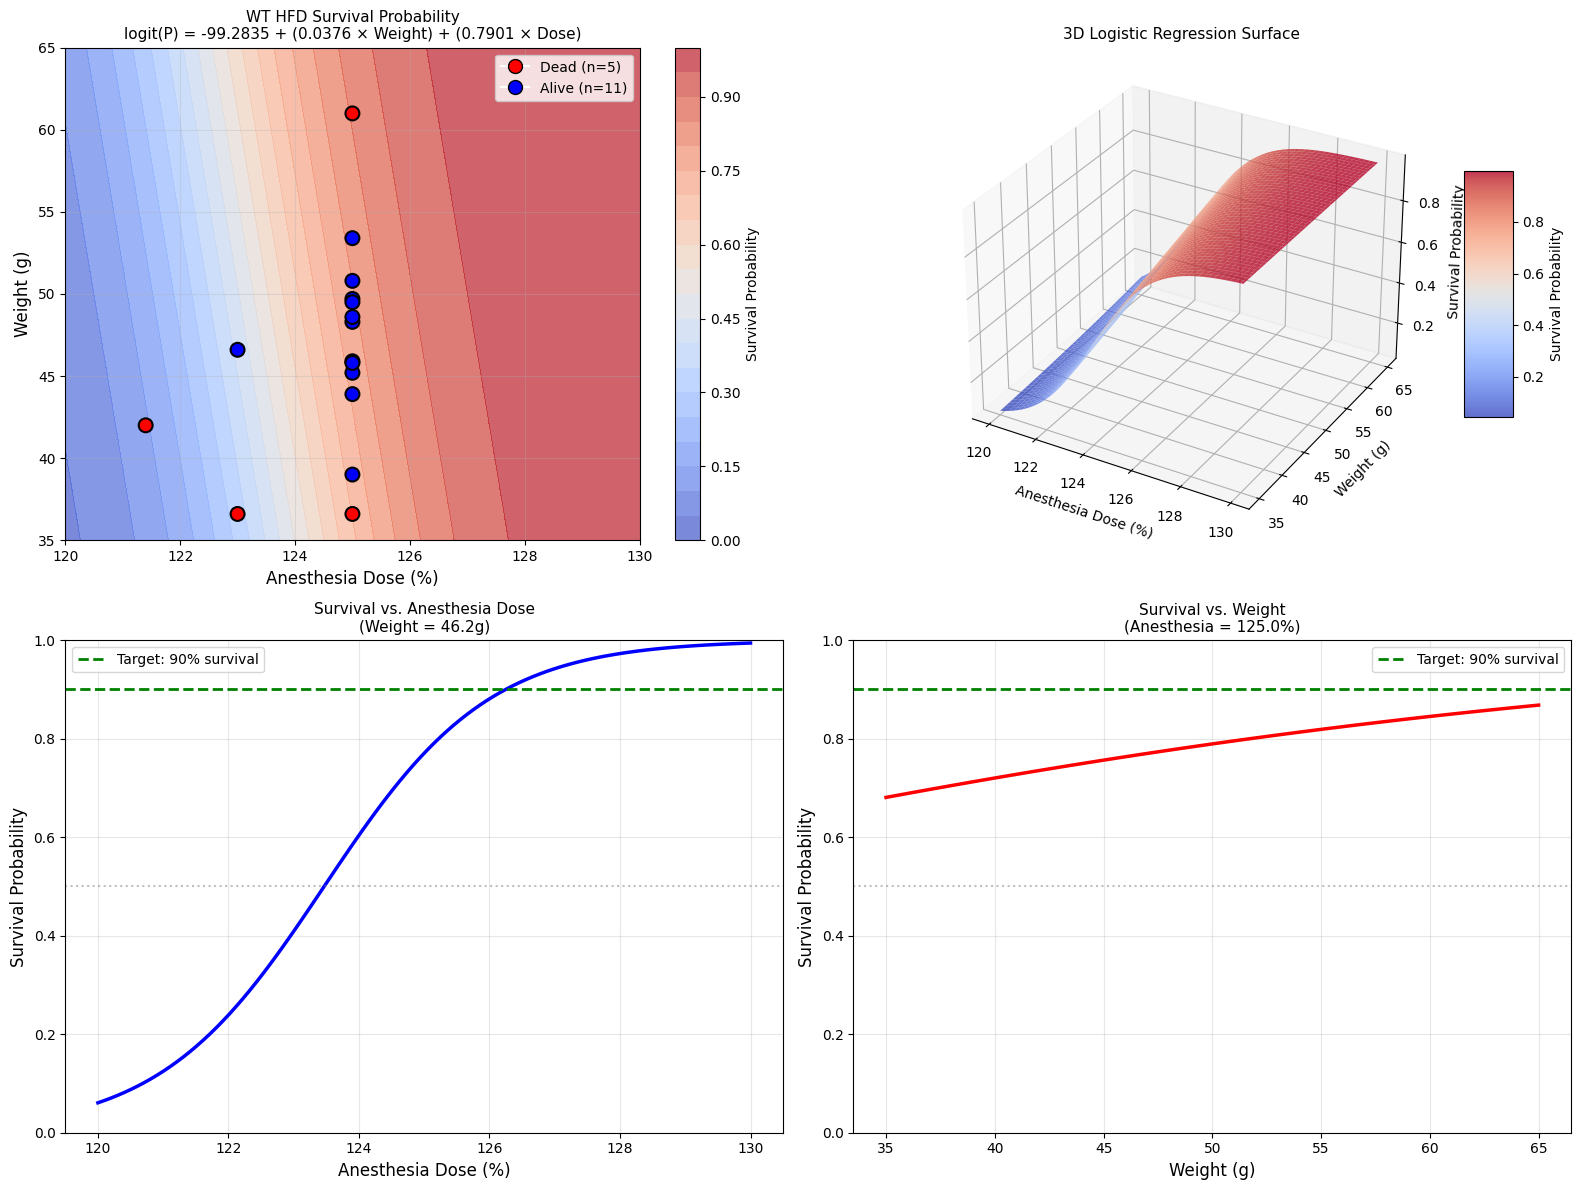


✓ Plot saved successfully!


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Filter data for WT HFD
subset = df[(df['Genotype'].isin(["WT"])) & (df['Diet'] == "HFD") &
                    (df['Anesthesia dose percentage from working dilution'].between(120, 130)) &
                    (df['Weight 0h'].between(35, 65)) &
                    (df['Alive after surgery'].notna())]

# DIAGNOSTIC CHECKS
print("=" * 60)
print("DIAGNOSTIC INFORMATION")
print("=" * 60)
print(f"\nTotal animals in subset: {len(subset)}")
alive_count = (subset['Alive after surgery'] == 1).sum()
dead_count = (subset['Alive after surgery'] == 0).sum()
print(f"Alive: {alive_count}")
print(f"Dead: {dead_count}")
print(f"Survival rate: {alive_count / len(subset) * 100:.1f}%")

# Show which animals are included
print("\nAnimals included in analysis:")
for idx, row in subset.iterrows():
    status = "ALIVE" if row['Alive after surgery'] == 1 else "DEAD"
    print(f"  ID {row['Animal ID']}: {status} - Weight:{row['Weight 0h']:.1f}g, Anesthesia:{row['Anesthesia dose percentage from working dilution']:.2f}%")

# Summary statistics by outcome
print("\n--- Dead animals ---")
dead_animals = subset[subset['Alive after surgery'] == 0]
print(f"Count: {len(dead_animals)}")
if len(dead_animals) > 0:
    print(f"Weight: {dead_animals['Weight 0h'].mean():.1f}g ± {dead_animals['Weight 0h'].std():.1f} (range: {dead_animals['Weight 0h'].min():.1f}-{dead_animals['Weight 0h'].max():.1f})")
    print(f"Anesthesia: {dead_animals['Anesthesia dose percentage from working dilution'].mean():.1f}% ± {dead_animals['Anesthesia dose percentage from working dilution'].std():.1f} (range: {dead_animals['Anesthesia dose percentage from working dilution'].min():.2f}-{dead_animals['Anesthesia dose percentage from working dilution'].max():.1f})")

print("\n--- Alive animals ---")
alive_animals = subset[subset['Alive after surgery'] == 1]
print(f"Count: {len(alive_animals)}")
if len(alive_animals) > 0:
    print(f"Weight: {alive_animals['Weight 0h'].mean():.1f}g ± {alive_animals['Weight 0h'].std():.1f} (range: {alive_animals['Weight 0h'].min():.1f}-{alive_animals['Weight 0h'].max():.1f})")
    print(f"Anesthesia: {alive_animals['Anesthesia dose percentage from working dilution'].mean():.1f}% ± {alive_animals['Anesthesia dose percentage from working dilution'].std():.1f} (range: {alive_animals['Anesthesia dose percentage from working dilution'].min():.1f}-{alive_animals['Anesthesia dose percentage from working dilution'].max():.1f})")

print("\n" + "=" * 60)

# Step 2: Prepare data for logistic regression
X_logistic = subset[['Weight 0h', 'Anesthesia dose percentage from working dilution']]
y_logistic = subset['Alive after surgery'].astype(int)
X_logistic = sm.add_constant(X_logistic)

# Step 3: Fit logistic regression model
logistic_model = sm.Logit(y_logistic, X_logistic).fit()

# Print model summary
print("\nLOGISTIC REGRESSION MODEL SUMMARY")
print("=" * 60)
print(logistic_model.summary())

# Print logistic regression equation
intercept = logistic_model.params['const']
coef_weight = logistic_model.params['Weight 0h']
coef_dose = logistic_model.params['Anesthesia dose percentage from working dilution']

print("\n" + "=" * 60)
print(f"Logistic equation: logit(P) = {intercept:.4f} + ({coef_weight:.4f} * Weight) + ({coef_dose:.4f} * Anesthesia)")
print(f"Equation for Dose Calculation: Anesthesia = (logit(0.9) - ({intercept:.4f}) - ({coef_weight:.4f} * Weight)) / ({coef_dose:.4f})")
print("=" * 60)

# Check coefficient significance
print("\n--- Coefficient Significance ---")
for var in logistic_model.pvalues.index:
    p_val = logistic_model.pvalues[var]
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "n.s."
    print(f"{var}: β={logistic_model.params[var]:.4f}, p={p_val:.4f} {sig}")

# Create equation for title
equation_title = f"logit(P) = {intercept:.4f} + ({coef_weight:.4f} × Weight) + ({coef_dose:.4f} × Dose)"

# Step 4: Create a range of weights and anesthesia doses for prediction
dose_range = np.linspace(120, 130, 100)
weight_range = np.linspace(35, 65, 50)
D, W = np.meshgrid(dose_range, weight_range)

# Step 5: Generate prediction data
grid_data = pd.DataFrame({
    'Weight 0h': W.ravel(), 
    'Anesthesia dose percentage from working dilution': D.ravel()
})
grid_data = sm.add_constant(grid_data)

# Predict survival probability
predicted_probs = logistic_model.predict(grid_data).values.reshape(D.shape)

# Step 6: Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# Plot 1: Contour plot with scatter
ax1 = fig.add_subplot(221)
contour = ax1.contourf(D, W, predicted_probs, levels=20, cmap="coolwarm", alpha=0.7)
cbar1 = plt.colorbar(contour, ax=ax1, label="Survival Probability")

# Scatter plot of actual data points
colors = ["red", "blue"]
cm = ListedColormap(colors)
scatter = ax1.scatter(subset['Anesthesia dose percentage from working dilution'], 
                      subset['Weight 0h'],
                      c=subset['Alive after surgery'], 
                      cmap=cm, 
                      edgecolor="black", 
                      s=100, 
                      linewidth=1.5,
                      zorder=5)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                              markeredgecolor='black', markersize=10, label=f'Dead (n={len(dead_animals)})'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                              markeredgecolor='black', markersize=10, label=f'Alive (n={len(alive_animals)})')]
ax1.legend(handles=legend_elements, loc='upper right')

ax1.set_xlim(120, 130)
ax1.set_ylim(35, 65)
ax1.set_xlabel("Anesthesia Dose (%)", fontsize=12)
ax1.set_ylabel("Weight (g)", fontsize=12)
ax1.set_title(f"WT HFD Survival Probability\n{equation_title}", fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: 3D surface plot
ax2 = fig.add_subplot(222, projection='3d')
surf = ax2.plot_surface(D, W, predicted_probs, cmap='coolwarm', alpha=0.8, edgecolor='none')
ax2.set_xlabel("Anesthesia Dose (%)", fontsize=10)
ax2.set_ylabel("Weight (g)", fontsize=10)
ax2.set_zlabel("Survival Probability", fontsize=10)
ax2.set_title("3D Logistic Regression Surface", fontsize=11)
fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5, label="Survival Probability")

# Plot 3: Survival probability vs. anesthesia dose at median weight
ax3 = fig.add_subplot(223)
median_weight = np.median(subset['Weight 0h'])
weight_idx = np.abs(weight_range - median_weight).argmin()
ax3.plot(dose_range, predicted_probs[weight_idx, :], 'b-', linewidth=2.5)
ax3.axhline(y=0.9, color='green', linestyle='--', linewidth=2, label='Target: 90% survival')
ax3.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
ax3.set_xlabel("Anesthesia Dose (%)", fontsize=12)
ax3.set_ylabel("Survival Probability", fontsize=12)
ax3.set_title(f"Survival vs. Anesthesia Dose\n(Weight = {median_weight:.1f}g)", fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 1)
ax3.legend(fontsize=10)

# Plot 4: Survival probability vs. weight at median anesthesia dose
ax4 = fig.add_subplot(224)
median_dose = np.median(subset['Anesthesia dose percentage from working dilution'])
dose_idx = np.abs(dose_range - median_dose).argmin()
ax4.plot(weight_range, predicted_probs[:, dose_idx], 'r-', linewidth=2.5)
ax4.axhline(y=0.9, color='green', linestyle='--', linewidth=2, label='Target: 90% survival')
ax4.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
ax4.set_xlabel("Weight (g)", fontsize=12)
ax4.set_ylabel("Survival Probability", fontsize=12)
ax4.set_title(f"Survival vs. Weight\n(Anesthesia = {median_dose:.1f}%)", fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 1)
ax4.legend(fontsize=10)

plt.tight_layout()
plt.savefig('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/WT HFD Log regression survival vs anesthesia vs weight_oct25.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plot saved successfully!")

### Tg NCD

DIAGNOSTIC INFORMATION

Total animals in subset: 26
Alive: 15
Dead: 11
Survival rate: 57.7%

Animals included in analysis:
  ID 73.0: DEAD - Weight:27.2g, Anesthesia:31.25%
  ID 74.0: ALIVE - Weight:32.7g, Anesthesia:35.15%
  ID 77.0: DEAD - Weight:31.9g, Anesthesia:40.00%
  ID 78.0: DEAD - Weight:25.2g, Anesthesia:40.00%
  ID 79.0: DEAD - Weight:29.0g, Anesthesia:40.00%
  ID 80.0: DEAD - Weight:28.9g, Anesthesia:38.00%
  ID 81.0: DEAD - Weight:25.4g, Anesthesia:35.50%
  ID 82.0: ALIVE - Weight:26.7g, Anesthesia:29.00%
  ID 83.0: ALIVE - Weight:28.1g, Anesthesia:30.25%
  ID 84.0: ALIVE - Weight:28.0g, Anesthesia:30.40%
  ID 85.0: DEAD - Weight:31.9g, Anesthesia:31.30%
  ID 118.0: ALIVE - Weight:32.9g, Anesthesia:30.40%
  ID 119.0: ALIVE - Weight:31.6g, Anesthesia:28.50%
  ID 120.0: ALIVE - Weight:28.0g, Anesthesia:27.70%
  ID 121.0: DEAD - Weight:34.8g, Anesthesia:30.20%
  ID 122.0: ALIVE - Weight:30.2g, Anesthesia:28.90%
  ID 123.0: DEAD - Weight:29.0g, Anesthesia:27.60%
  ID 125.0: D

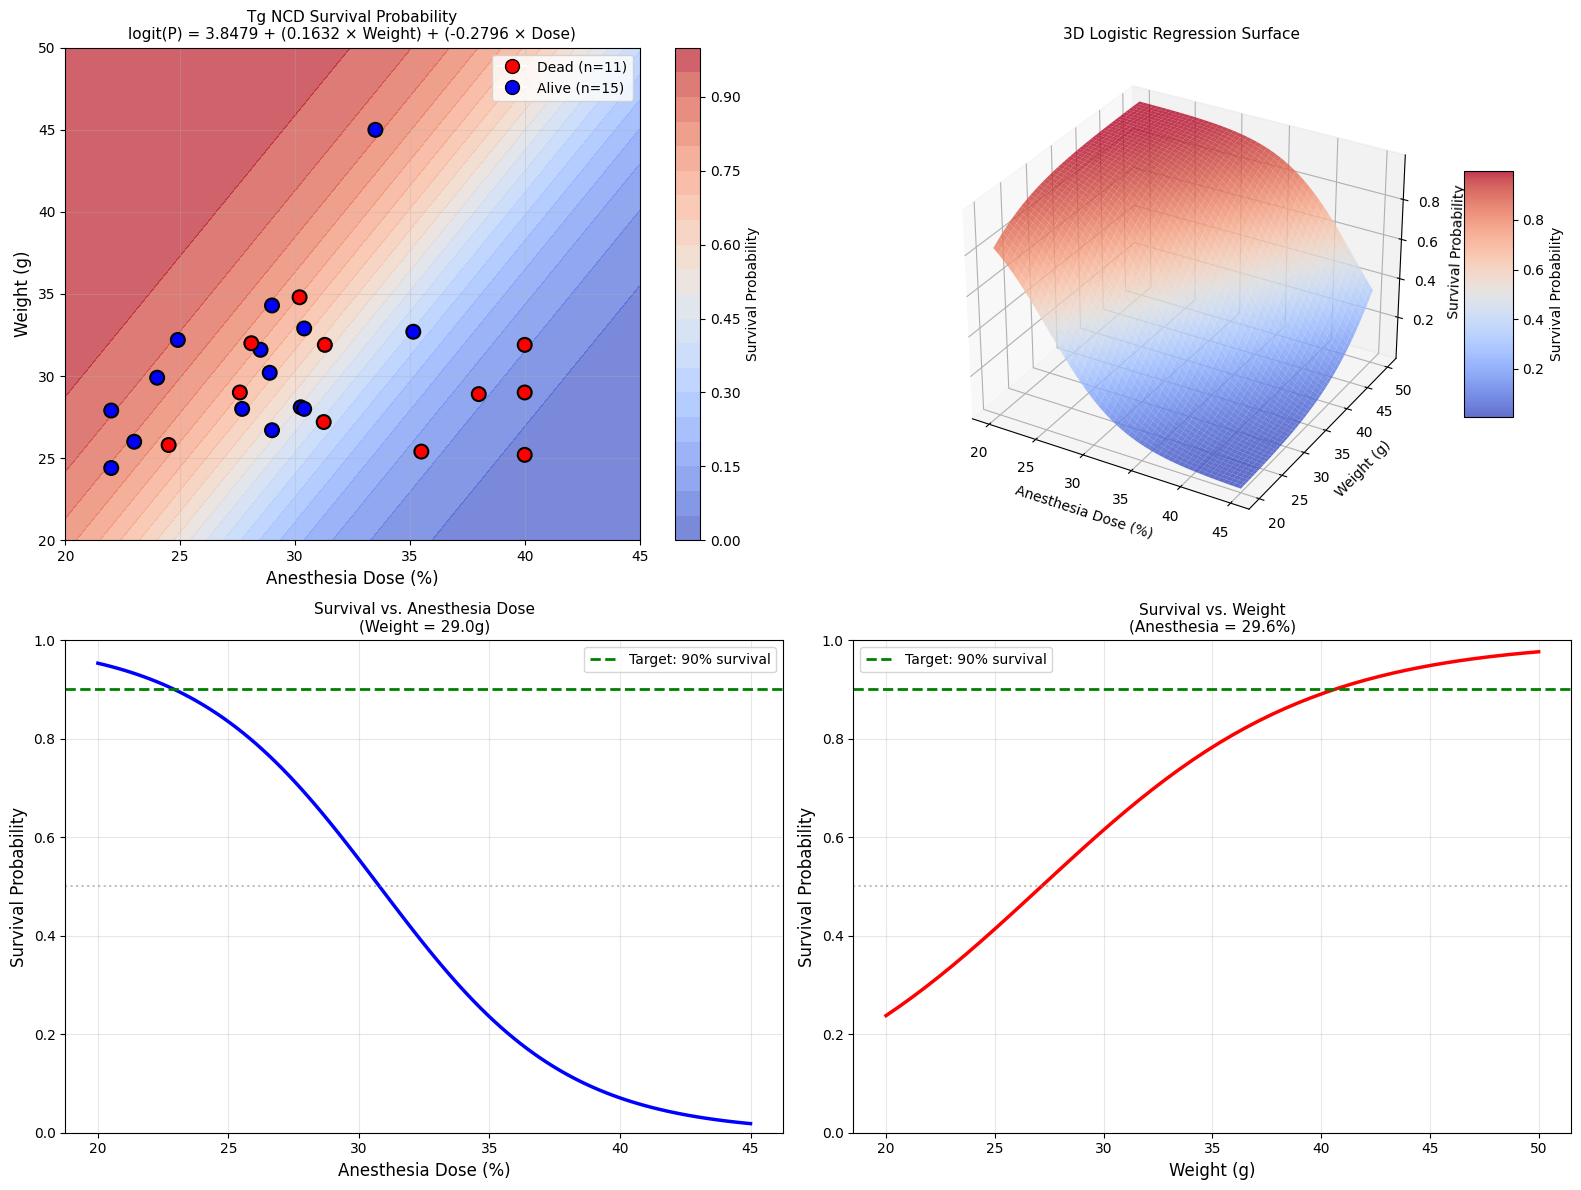


✓ Plot saved successfully!


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Filter data - MODIFIED to include low doses or not
# Option A: Include animal 506 (remove lower bound on anesthesia)
subset = df[(df['Genotype'].isin(["Tg"])) & (df['Diet'] == "NCD") &
                    (df['Anesthesia dose percentage from working dilution'] > 20) &  # Changed from .between(20, 45)
                    (df['Anesthesia dose percentage from working dilution'] <= 45) &
                    (df['Weight 0h'].between(20, 50)) &
                    (df['Alive after surgery'].notna())]

# OR Option B: Keep original filter (excludes animal 506)
# subset = df[(df['Genotype'].isin(["Tg"])) & (df['Diet'] == "NCD") &
#                     (df['Anesthesia dose percentage from working dilution'].between(20, 45)) &
#                     (df['Weight 0h'].between(20, 40)) &
#                     (df['Alive after surgery'].notna())]

# DIAGNOSTIC CHECKS
print("=" * 60)
print("DIAGNOSTIC INFORMATION")
print("=" * 60)
print(f"\nTotal animals in subset: {len(subset)}")
alive_count = (subset['Alive after surgery'] == 1).sum()
dead_count = (subset['Alive after surgery'] == 0).sum()
print(f"Alive: {alive_count}")
print(f"Dead: {dead_count}")
print(f"Survival rate: {alive_count / len(subset) * 100:.1f}%")

# Show which animals are included
print("\nAnimals included in analysis:")
for idx, row in subset.iterrows():
    status = "ALIVE" if row['Alive after surgery'] == 1 else "DEAD"
    print(f"  ID {row['Animal ID']}: {status} - Weight:{row['Weight 0h']:.1f}g, Anesthesia:{row['Anesthesia dose percentage from working dilution']:.2f}%")

# Summary statistics by outcome
print("\n--- Dead animals ---")
dead_animals = subset[subset['Alive after surgery'] == 0]
print(f"Count: {len(dead_animals)}")
if len(dead_animals) > 0:
    print(f"Weight: {dead_animals['Weight 0h'].mean():.1f}g ± {dead_animals['Weight 0h'].std():.1f} (range: {dead_animals['Weight 0h'].min():.1f}-{dead_animals['Weight 0h'].max():.1f})")
    print(f"Anesthesia: {dead_animals['Anesthesia dose percentage from working dilution'].mean():.1f}% ± {dead_animals['Anesthesia dose percentage from working dilution'].std():.1f} (range: {dead_animals['Anesthesia dose percentage from working dilution'].min():.2f}-{dead_animals['Anesthesia dose percentage from working dilution'].max():.1f})")

print("\n--- Alive animals ---")
alive_animals = subset[subset['Alive after surgery'] == 1]
print(f"Count: {len(alive_animals)}")
if len(alive_animals) > 0:
    print(f"Weight: {alive_animals['Weight 0h'].mean():.1f}g ± {alive_animals['Weight 0h'].std():.1f} (range: {alive_animals['Weight 0h'].min():.1f}-{alive_animals['Weight 0h'].max():.1f})")
    print(f"Anesthesia: {alive_animals['Anesthesia dose percentage from working dilution'].mean():.1f}% ± {alive_animals['Anesthesia dose percentage from working dilution'].std():.1f} (range: {alive_animals['Anesthesia dose percentage from working dilution'].min():.1f}-{alive_animals['Anesthesia dose percentage from working dilution'].max():.1f})")

print("\n" + "=" * 60)

# Step 2: Prepare data for logistic regression
X_logistic = subset[['Weight 0h', 'Anesthesia dose percentage from working dilution']]
y_logistic = subset['Alive after surgery'].astype(int)
X_logistic = sm.add_constant(X_logistic)

# Step 3: Fit logistic regression model
logistic_model = sm.Logit(y_logistic, X_logistic).fit()

# Print model summary
print("\nLOGISTIC REGRESSION MODEL SUMMARY")
print("=" * 60)
print(logistic_model.summary())

# Print logistic regression equation
intercept = logistic_model.params['const']
coef_weight = logistic_model.params['Weight 0h']
coef_dose = logistic_model.params['Anesthesia dose percentage from working dilution']

print("\n" + "=" * 60)
print(f"Logistic equation: logit(P) = {intercept:.4f} + ({coef_weight:.4f} * Weight) + ({coef_dose:.4f} * Anesthesia)")
print(f"Equation for Dose Calculation: Anesthesia = (logit(0.9) - ({intercept:.4f}) - ({coef_weight:.4f} * Weight)) / ({coef_dose:.4f})")
print("=" * 60)

# Check coefficient significance
print("\n--- Coefficient Significance ---")
for var in logistic_model.pvalues.index:
    p_val = logistic_model.pvalues[var]
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "n.s."
    print(f"{var}: β={logistic_model.params[var]:.4f}, p={p_val:.4f} {sig}")

# Create equation for title
equation_title = f"logit(P) = {intercept:.4f} + ({coef_weight:.4f} × Weight) + ({coef_dose:.4f} × Dose)"

# Step 4: Create a range of weights and anesthesia doses for prediction
dose_range = np.linspace(20, 45, 100)  # Extended to include low doses
weight_range = np.linspace(20, 50, 50)
D, W = np.meshgrid(dose_range, weight_range)

# Step 5: Generate prediction data
grid_data = pd.DataFrame({
    'Weight 0h': W.ravel(), 
    'Anesthesia dose percentage from working dilution': D.ravel()
})
grid_data = sm.add_constant(grid_data)

# Predict survival probability
predicted_probs = logistic_model.predict(grid_data).values.reshape(D.shape)

# Step 6: Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# Plot 1: Contour plot with scatter
ax1 = fig.add_subplot(221)
contour = ax1.contourf(D, W, predicted_probs, levels=20, cmap="coolwarm", alpha=0.7)
cbar1 = plt.colorbar(contour, ax=ax1, label="Survival Probability")

# Scatter plot of actual data points
colors = ["red", "blue"]
cm = ListedColormap(colors)
scatter = ax1.scatter(subset['Anesthesia dose percentage from working dilution'], 
                      subset['Weight 0h'],
                      c=subset['Alive after surgery'], 
                      cmap=cm, 
                      edgecolor="black", 
                      s=100, 
                      linewidth=1.5,
                      zorder=5)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                              markeredgecolor='black', markersize=10, label=f'Dead (n={len(dead_animals)})'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                              markeredgecolor='black', markersize=10, label=f'Alive (n={len(alive_animals)})')]
ax1.legend(handles=legend_elements, loc='upper right')

ax1.set_xlim(20, 45)
ax1.set_ylim(20, 50)
ax1.set_xlabel("Anesthesia Dose (%)", fontsize=12)
ax1.set_ylabel("Weight (g)", fontsize=12)
ax1.set_title(f"Tg NCD Survival Probability\n{equation_title}", fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: 3D surface plot
ax2 = fig.add_subplot(222, projection='3d')
surf = ax2.plot_surface(D, W, predicted_probs, cmap='coolwarm', alpha=0.8, edgecolor='none')
ax2.set_xlabel("Anesthesia Dose (%)", fontsize=10)
ax2.set_ylabel("Weight (g)", fontsize=10)
ax2.set_zlabel("Survival Probability", fontsize=10)
ax2.set_title("3D Logistic Regression Surface", fontsize=11)
fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5, label="Survival Probability")

# Plot 3: Survival probability vs. anesthesia dose at median weight
ax3 = fig.add_subplot(223)
median_weight = np.median(subset['Weight 0h'])
weight_idx = np.abs(weight_range - median_weight).argmin()
ax3.plot(dose_range, predicted_probs[weight_idx, :], 'b-', linewidth=2.5)
ax3.axhline(y=0.9, color='green', linestyle='--', linewidth=2, label='Target: 90% survival')
ax3.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
ax3.set_xlabel("Anesthesia Dose (%)", fontsize=12)
ax3.set_ylabel("Survival Probability", fontsize=12)
ax3.set_title(f"Survival vs. Anesthesia Dose\n(Weight = {median_weight:.1f}g)", fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 1)
ax3.legend(fontsize=10)

# Plot 4: Survival probability vs. weight at median anesthesia dose
ax4 = fig.add_subplot(224)
median_dose = np.median(subset['Anesthesia dose percentage from working dilution'])
dose_idx = np.abs(dose_range - median_dose).argmin()
ax4.plot(weight_range, predicted_probs[:, dose_idx], 'r-', linewidth=2.5)
ax4.axhline(y=0.9, color='green', linestyle='--', linewidth=2, label='Target: 90% survival')
ax4.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
ax4.set_xlabel("Weight (g)", fontsize=12)
ax4.set_ylabel("Survival Probability", fontsize=12)
ax4.set_title(f"Survival vs. Weight\n(Anesthesia = {median_dose:.1f}%)", fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 1)
ax4.legend(fontsize=10)

plt.tight_layout()
plt.savefig('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/Tg NCD Log regression survival vs anesthesia vs weight_oct25.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plot saved successfully!")

### Tg HFD

DIAGNOSTIC INFORMATION

Total animals in subset: 11
Alive: 9
Dead: 2
Survival rate: 81.8%

Animals included in analysis:
  ID 69.0: ALIVE - Weight:40.4g, Anesthesia:40.00%
  ID 87.0: ALIVE - Weight:45.3g, Anesthesia:38.50%
  ID 90.0: ALIVE - Weight:51.5g, Anesthesia:39.00%
  ID 93.0: DEAD - Weight:29.0g, Anesthesia:33.50%
  ID 94.0: ALIVE - Weight:47.0g, Anesthesia:35.00%
  ID 97.0: DEAD - Weight:46.3g, Anesthesia:35.65%
  ID 99.0: ALIVE - Weight:45.3g, Anesthesia:38.50%
  ID 100.0: ALIVE - Weight:50.4g, Anesthesia:39.50%
  ID 128.0: ALIVE - Weight:37.1g, Anesthesia:31.00%
  ID 130.0: ALIVE - Weight:36.4g, Anesthesia:30.00%
  ID 132.0: ALIVE - Weight:44.5g, Anesthesia:39.30%

--- Dead animals ---
Count: 2
Weight: 37.6g ± 12.2 (range: 29.0-46.3)
Anesthesia: 34.6% ± 1.5 (range: 33.50-35.6)

--- Alive animals ---
Count: 9
Weight: 44.2g ± 5.3 (range: 36.4-51.5)
Anesthesia: 36.8% ± 3.8 (range: 30.0-40.0)

Optimization terminated successfully.
         Current function value: 0.399709
      

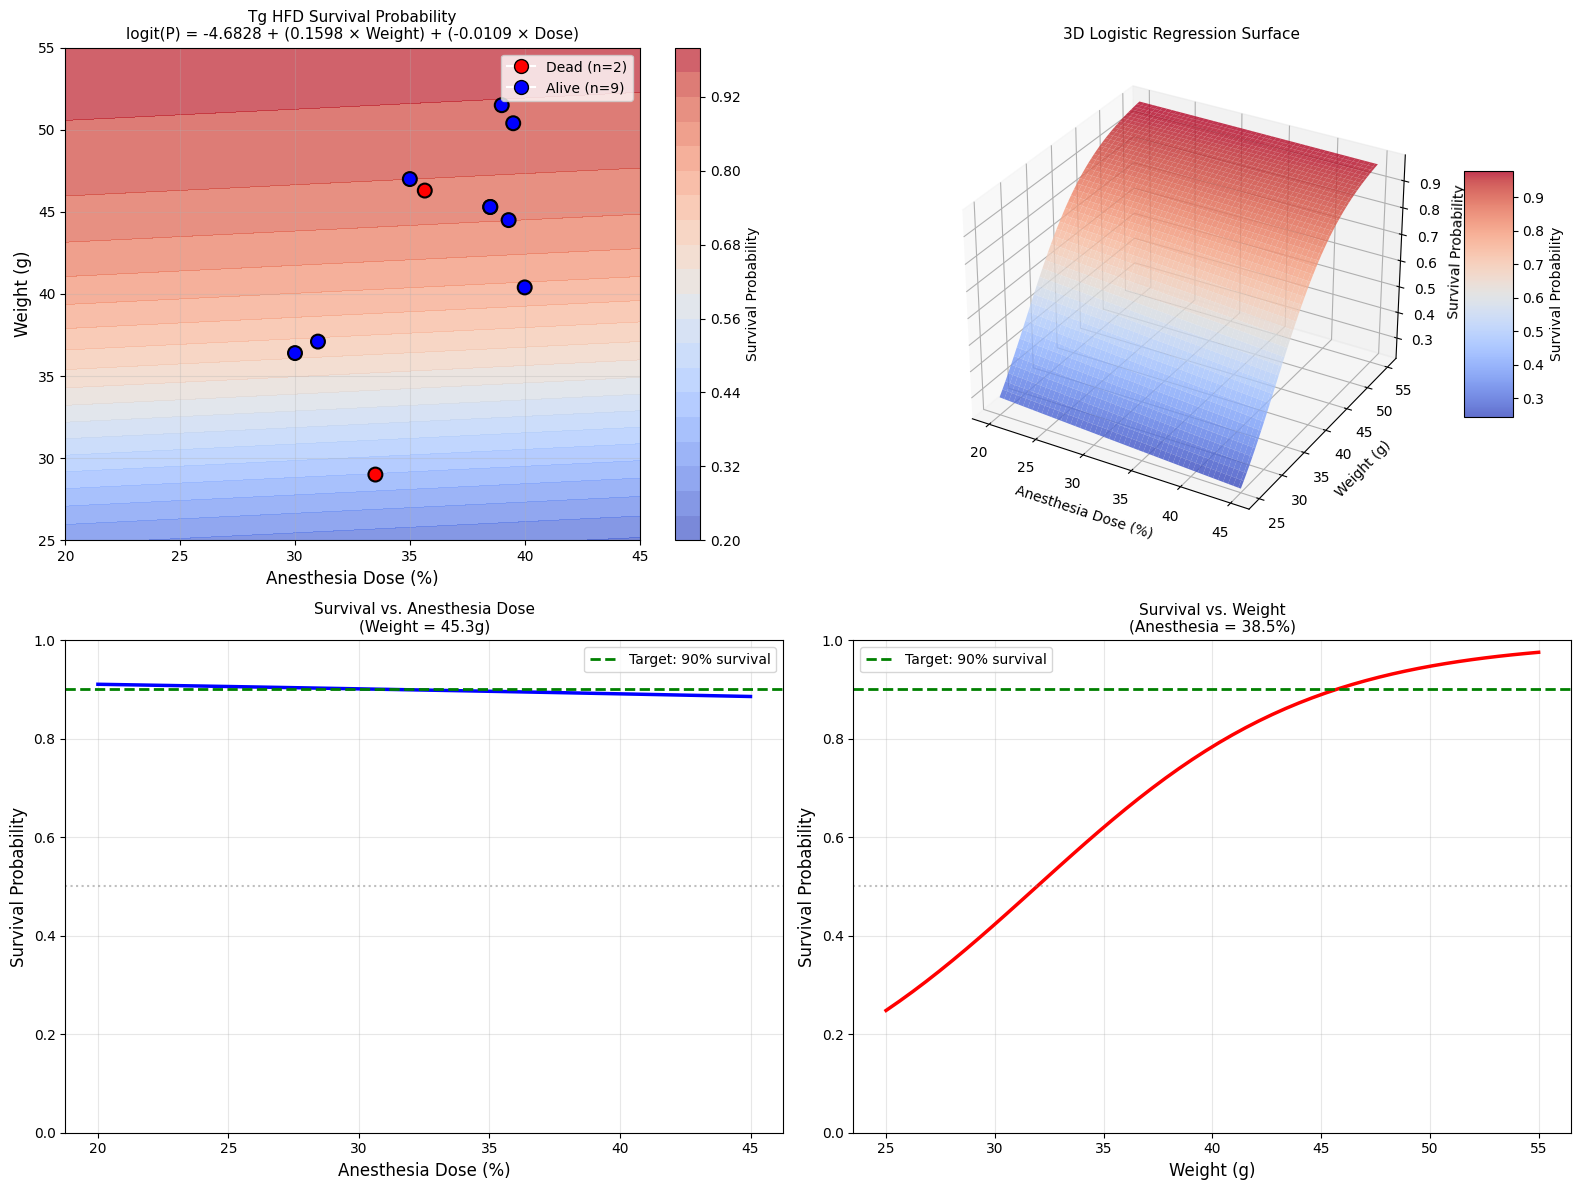


✓ Plot saved successfully!


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Filter data for Tg HFD
subset = df[(df['Genotype'].isin(["Tg"])) & (df['Diet'] == "HFD") &
                    (df['Anesthesia dose percentage from working dilution'].between(20, 45)) &
                    (df['Weight 0h'].between(25, 55)) &
                    (df['Alive after surgery'].notna())]

# DIAGNOSTIC CHECKS
print("=" * 60)
print("DIAGNOSTIC INFORMATION")
print("=" * 60)
print(f"\nTotal animals in subset: {len(subset)}")
alive_count = (subset['Alive after surgery'] == 1).sum()
dead_count = (subset['Alive after surgery'] == 0).sum()
print(f"Alive: {alive_count}")
print(f"Dead: {dead_count}")
print(f"Survival rate: {alive_count / len(subset) * 100:.1f}%")

# Show which animals are included
print("\nAnimals included in analysis:")
for idx, row in subset.iterrows():
    status = "ALIVE" if row['Alive after surgery'] == 1 else "DEAD"
    print(f"  ID {row['Animal ID']}: {status} - Weight:{row['Weight 0h']:.1f}g, Anesthesia:{row['Anesthesia dose percentage from working dilution']:.2f}%")

# Summary statistics by outcome
print("\n--- Dead animals ---")
dead_animals = subset[subset['Alive after surgery'] == 0]
print(f"Count: {len(dead_animals)}")
if len(dead_animals) > 0:
    print(f"Weight: {dead_animals['Weight 0h'].mean():.1f}g ± {dead_animals['Weight 0h'].std():.1f} (range: {dead_animals['Weight 0h'].min():.1f}-{dead_animals['Weight 0h'].max():.1f})")
    print(f"Anesthesia: {dead_animals['Anesthesia dose percentage from working dilution'].mean():.1f}% ± {dead_animals['Anesthesia dose percentage from working dilution'].std():.1f} (range: {dead_animals['Anesthesia dose percentage from working dilution'].min():.2f}-{dead_animals['Anesthesia dose percentage from working dilution'].max():.1f})")

print("\n--- Alive animals ---")
alive_animals = subset[subset['Alive after surgery'] == 1]
print(f"Count: {len(alive_animals)}")
if len(alive_animals) > 0:
    print(f"Weight: {alive_animals['Weight 0h'].mean():.1f}g ± {alive_animals['Weight 0h'].std():.1f} (range: {alive_animals['Weight 0h'].min():.1f}-{alive_animals['Weight 0h'].max():.1f})")
    print(f"Anesthesia: {alive_animals['Anesthesia dose percentage from working dilution'].mean():.1f}% ± {alive_animals['Anesthesia dose percentage from working dilution'].std():.1f} (range: {alive_animals['Anesthesia dose percentage from working dilution'].min():.1f}-{alive_animals['Anesthesia dose percentage from working dilution'].max():.1f})")

print("\n" + "=" * 60)

# Step 2: Prepare data for logistic regression
X_logistic = subset[['Weight 0h', 'Anesthesia dose percentage from working dilution']]
y_logistic = subset['Alive after surgery'].astype(int)
X_logistic = sm.add_constant(X_logistic)

# Step 3: Fit logistic regression model
logistic_model = sm.Logit(y_logistic, X_logistic).fit()

# Print model summary
print("\nLOGISTIC REGRESSION MODEL SUMMARY")
print("=" * 60)
print(logistic_model.summary())

# Print logistic regression equation
intercept = logistic_model.params['const']
coef_weight = logistic_model.params['Weight 0h']
coef_dose = logistic_model.params['Anesthesia dose percentage from working dilution']

print("\n" + "=" * 60)
print(f"Logistic equation: logit(P) = {intercept:.4f} + ({coef_weight:.4f} * Weight) + ({coef_dose:.4f} * Anesthesia)")
print(f"Equation for Dose Calculation: Anesthesia = (logit(0.9) - ({intercept:.4f}) - ({coef_weight:.4f} * Weight)) / ({coef_dose:.4f})")
print("=" * 60)

# Check coefficient significance
print("\n--- Coefficient Significance ---")
for var in logistic_model.pvalues.index:
    p_val = logistic_model.pvalues[var]
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "n.s."
    print(f"{var}: β={logistic_model.params[var]:.4f}, p={p_val:.4f} {sig}")

# Create equation for title
equation_title = f"logit(P) = {intercept:.4f} + ({coef_weight:.4f} × Weight) + ({coef_dose:.4f} × Dose)"

# Step 4: Create a range of weights and anesthesia doses for prediction
dose_range = np.linspace(20, 45, 100)
weight_range = np.linspace(25, 55, 50)
D, W = np.meshgrid(dose_range, weight_range)

# Step 5: Generate prediction data
grid_data = pd.DataFrame({
    'Weight 0h': W.ravel(), 
    'Anesthesia dose percentage from working dilution': D.ravel()
})
grid_data = sm.add_constant(grid_data)

# Predict survival probability
predicted_probs = logistic_model.predict(grid_data).values.reshape(D.shape)

# Step 6: Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# Plot 1: Contour plot with scatter
ax1 = fig.add_subplot(221)
contour = ax1.contourf(D, W, predicted_probs, levels=20, cmap="coolwarm", alpha=0.7)
cbar1 = plt.colorbar(contour, ax=ax1, label="Survival Probability")

# Scatter plot of actual data points
colors = ["red", "blue"]
cm = ListedColormap(colors)
scatter = ax1.scatter(subset['Anesthesia dose percentage from working dilution'], 
                      subset['Weight 0h'],
                      c=subset['Alive after surgery'], 
                      cmap=cm, 
                      edgecolor="black", 
                      s=100, 
                      linewidth=1.5,
                      zorder=5)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                              markeredgecolor='black', markersize=10, label=f'Dead (n={len(dead_animals)})'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                              markeredgecolor='black', markersize=10, label=f'Alive (n={len(alive_animals)})')]
ax1.legend(handles=legend_elements, loc='upper right')

ax1.set_xlim(20, 45)
ax1.set_ylim(25, 55)
ax1.set_xlabel("Anesthesia Dose (%)", fontsize=12)
ax1.set_ylabel("Weight (g)", fontsize=12)
ax1.set_title(f"Tg HFD Survival Probability\n{equation_title}", fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: 3D surface plot
ax2 = fig.add_subplot(222, projection='3d')
surf = ax2.plot_surface(D, W, predicted_probs, cmap='coolwarm', alpha=0.8, edgecolor='none')
ax2.set_xlabel("Anesthesia Dose (%)", fontsize=10)
ax2.set_ylabel("Weight (g)", fontsize=10)
ax2.set_zlabel("Survival Probability", fontsize=10)
ax2.set_title("3D Logistic Regression Surface", fontsize=11)
fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5, label="Survival Probability")

# Plot 3: Survival probability vs. anesthesia dose at median weight
ax3 = fig.add_subplot(223)
median_weight = np.median(subset['Weight 0h'])
weight_idx = np.abs(weight_range - median_weight).argmin()
ax3.plot(dose_range, predicted_probs[weight_idx, :], 'b-', linewidth=2.5)
ax3.axhline(y=0.9, color='green', linestyle='--', linewidth=2, label='Target: 90% survival')
ax3.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
ax3.set_xlabel("Anesthesia Dose (%)", fontsize=12)
ax3.set_ylabel("Survival Probability", fontsize=12)
ax3.set_title(f"Survival vs. Anesthesia Dose\n(Weight = {median_weight:.1f}g)", fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 1)
ax3.legend(fontsize=10)

# Plot 4: Survival probability vs. weight at median anesthesia dose
ax4 = fig.add_subplot(224)
median_dose = np.median(subset['Anesthesia dose percentage from working dilution'])
dose_idx = np.abs(dose_range - median_dose).argmin()
ax4.plot(weight_range, predicted_probs[:, dose_idx], 'r-', linewidth=2.5)
ax4.axhline(y=0.9, color='green', linestyle='--', linewidth=2, label='Target: 90% survival')
ax4.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
ax4.set_xlabel("Weight (g)", fontsize=12)
ax4.set_ylabel("Survival Probability", fontsize=12)
ax4.set_title(f"Survival vs. Weight\n(Anesthesia = {median_dose:.1f}%)", fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 1)
ax4.legend(fontsize=10)

plt.tight_layout()
plt.savefig('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/Tg HFD Log regression survival vs anesthesia vs weight_oct25.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plot saved successfully!")

## Surgery/surgeon performance

### Mean coordinates and error

In [22]:
import pandas as pd
import numpy as np

# [Assuming df_filtered and desired_order are already defined]

# Group by experimental condition and calculate statistics
grouped = df_filtered.groupby('Experimental Condition').agg(
    Left_AP_Mean=('Left AP', 'mean'),
    Left_ML_Mean=('Left ML', 'mean'),
    Left_DV_Mean=('Left DV', 'mean'),
    Left_Droplet_Median=('Left Droplet', 'median'),
    Right_AP_Mean=('Right AP', 'mean'),
    Right_ML_Mean=('Right ML', 'mean'),
    Right_DV_Mean=('Right DV', 'mean'),
    Right_Droplet_Median=('Right Droplet', 'median')
).reindex(desired_order)

# Calculate the mean between left and right AP, ML, and DV
grouped['AP_Mean'] = (grouped['Left_AP_Mean'] + grouped['Right_AP_Mean']) / 2
grouped['ML_Mean'] = (grouped['Left_ML_Mean'] + grouped['Right_ML_Mean']) / 2
grouped['DV_Mean'] = (grouped['Left_DV_Mean'] + grouped['Right_DV_Mean']) / 2

# Define target values
target_AP = -0.31
target_ML = 0.12
target_DV = -0.42

# Calculate Euclidean distance from target for each group
grouped['Euclidean_Distance_mm'] = np.sqrt(
    (grouped['AP_Mean'] - target_AP)**2 + 
    (grouped['ML_Mean'] - target_ML)**2 + 
    (grouped['DV_Mean'] - target_DV)**2
)

# Calculate the error percentage for each experimental group
grouped['AP_Error_%'] = ((grouped['AP_Mean'] - target_AP) / target_AP) * 100
grouped['ML_Error_%'] = ((grouped['ML_Mean'] - target_ML) / target_ML) * 100
grouped['DV_Error_%'] = ((grouped['DV_Mean'] - target_DV) / target_DV) * 100

# Convert error percentages to absolute values
grouped['AP_Error_%_Abs'] = grouped['AP_Error_%'].abs()
grouped['ML_Error_%_Abs'] = grouped['ML_Error_%'].abs()
grouped['DV_Error_%_Abs'] = grouped['DV_Error_%'].abs()

# Calculate the overall mean error per group using absolute values
grouped['Overall_Mean_Error_%'] = (grouped['AP_Error_%_Abs'] + grouped['ML_Error_%_Abs'] + grouped['DV_Error_%_Abs']) / 3

# Calculate overall means for AP, ML, and DV
overall_AP_Mean = grouped['AP_Mean'].mean()
overall_ML_Mean = grouped['ML_Mean'].mean()
overall_DV_Mean = grouped['DV_Mean'].mean()

# Calculate overall Euclidean distance from target
overall_Euclidean_Distance = np.sqrt(
    (overall_AP_Mean - target_AP)**2 + 
    (overall_ML_Mean - target_ML)**2 + 
    (overall_DV_Mean - target_DV)**2
)

# Calculate mean Euclidean distance across all groups
mean_Euclidean_Distance = grouped['Euclidean_Distance_mm'].mean()

# Calculate overall percentage errors
overall_AP_Error = ((overall_AP_Mean - target_AP) / target_AP) * 100
overall_ML_Error = ((overall_ML_Mean - target_ML) / target_ML) * 100
overall_DV_Error = ((overall_DV_Mean - target_DV) / target_DV) * 100

# Convert overall errors to absolute values
overall_AP_Error_Abs = abs(overall_AP_Error)
overall_ML_Error_Abs = abs(overall_ML_Error)
overall_DV_Error_Abs = abs(overall_DV_Error)

# Calculate the overall mean error using absolute values
overall_Mean_Error = (overall_AP_Error_Abs + overall_ML_Error_Abs + overall_DV_Error_Abs) / 3

# Create a summary dataframe
overall_summary = pd.DataFrame({
    "Overall AP Mean": [overall_AP_Mean],
    "Overall ML Mean": [overall_ML_Mean],
    "Overall DV Mean": [overall_DV_Mean],
    "Overall Euclidean Distance (mm)": [overall_Euclidean_Distance],
    "Mean Euclidean Distance Across Groups (mm)": [mean_Euclidean_Distance],
    "Overall AP Error %": [overall_AP_Error],
    "Overall ML Error %": [overall_ML_Error],
    "Overall DV Error %": [overall_DV_Error],
    "Overall AP Error % (Abs)": [overall_AP_Error_Abs],
    "Overall ML Error % (Abs)": [overall_ML_Error_Abs],
    "Overall DV Error % (Abs)": [overall_DV_Error_Abs],
    "Overall Mean Error %": [overall_Mean_Error]
})

# Save to Excel
grouped.to_excel('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/22wo Coordinates log_oct25.xlsx')
overall_summary.to_excel('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/22wo Coordinates summary_oct25.xlsx')

# Display results
display(grouped)
display(overall_summary)

# Optional: Print a summary message
print(f"\n=== Summary ===")
print(f"Overall Euclidean Distance from Target: {overall_Euclidean_Distance:.4f} mm")
print(f"Mean Euclidean Distance Across All Groups: {mean_Euclidean_Distance:.4f} mm")
print(f"Overall Mean Percentage Error: {overall_Mean_Error:.2f}%")

,Left_AP_Mean,Left_ML_Mean,Left_DV_Mean,Left_Droplet_Median,Right_AP_Mean,Right_ML_Mean,Right_DV_Mean,Right_Droplet_Median,AP_Mean,ML_Mean,DV_Mean,Euclidean_Distance_mm,AP_Error_%,ML_Error_%,DV_Error_%,AP_Error_%_Abs,ML_Error_%_Abs,DV_Error_%_Abs,Overall_Mean_Error_%
Experimental Condition,,,,,,,,,,,,,,,,,,,
WT_NCD_EV,-0.3100,0.200000,-0.431111,0.0,-0.310000,-0.231111,-0.423333,0.0,-0.310000,-0.015556,-0.427222,0.135748,-0.000000,-112.962963,1.719577,0.000000,112.962963,1.719577,38.227513
WT_NCD_IDE,-0.3100,0.110000,-0.427143,0.0,-0.311429,-0.117143,-0.424286,0.0,-0.310714,-0.003571,-0.425714,0.123706,0.230415,-102.976190,1.360544,0.230415,102.976190,1.360544,34.855716
WT_HFD_EV,-0.3100,0.111667,-0.425000,0.0,-0.311667,-0.081667,-0.418333,0.0,-0.310833,0.015000,-0.421667,0.105017,0.268817,-87.500000,0.396825,0.268817,87.500000,0.396825,29.388548
WT_HFD_IDE,-0.3100,0.258000,-0.424000,0.0,-0.310000,-0.122000,-0.420000,0.0,-0.310000,0.068000,-0.422000,0.052038,-0.000000,-43.333333,0.476190,0.000000,43.333333,0.476190,14.603175
Tg_NCD_EV,-0.3080,0.115000,-0.424000,0.0,-0.308000,-0.117000,-0.422000,0.0,-0.308000,-0.001000,-0.423000,0.121054,-0.645161,-100.833333,0.714286,0.645161,100.833333,0.714286,34.064260
Tg_NCD_IDE,-0.3100,0.118000,-0.422000,0.0,-0.310000,-0.120000,-0.420000,0.0,-0.310000,-0.001000,-0.421000,0.121004,-0.000000,-100.833333,0.238095,0.000000,100.833333,0.238095,33.690476
Tg_HFD_EV,-0.3120,0.112000,-0.428000,0.0,-0.304000,-0.110000,-0.432000,0.0,-0.308000,0.001000,-0.430000,0.119436,-0.645161,-99.166667,2.380952,0.645161,99.166667,2.380952,34.064260
Tg_HFD_IDE,-0.3125,0.110000,-0.427500,0.5,-0.310000,-0.110000,-0.427500,0.0,-0.311250,0.000000,-0.427500,0.120241,0.403226,-100.000000,1.785714,0.403226,100.000000,1.785714,34.062980


,Overall AP Mean,Overall ML Mean,Overall DV Mean,Overall Euclidean Distance (mm),Mean Euclidean Distance Across Groups (mm),Overall AP Error %,Overall ML Error %,Overall DV Error %,Overall AP Error % (Abs),Overall ML Error % (Abs),Overall DV Error % (Abs),Overall Mean Error %
0,-0.30985,0.007859,-0.424763,0.112242,0.11228,-0.048483,-93.450728,1.134023,0.048483,93.450728,1.134023,31.544411



=== Summary ===
Overall Euclidean Distance from Target: 0.1122 mm
Mean Euclidean Distance Across All Groups: 0.1123 mm
Overall Mean Percentage Error: 31.54%


### Error per operator

In [23]:
import pandas as pd
import numpy as np

# Convert right ML values to positive
df_filtered['Right ML'] = df_filtered['Right ML'].abs()

# Calculate the mean between left and right for each mouse
df_filtered['AP_Mean'] = (df_filtered['Left AP'] + df_filtered['Right AP']) / 2
df_filtered['ML_Mean'] = (df_filtered['Left ML'] + df_filtered['Right ML']) / 2
df_filtered['DV_Mean'] = (df_filtered['Left DV'] + df_filtered['Right DV']) / 2

# Define target values
target_AP = -0.31
target_ML = 0.12
target_DV = -0.42

# Calculate Euclidean distance from target for each mouse
df_filtered['Euclidean_Distance_mm'] = np.sqrt(
    (df_filtered['AP_Mean'] - target_AP)**2 + 
    (df_filtered['ML_Mean'] - target_ML)**2 + 
    (df_filtered['DV_Mean'] - target_DV)**2
)

# Calculate the error percentage for each mouse and take absolute values
df_filtered['AP_Error_%'] = ((df_filtered['AP_Mean'] - target_AP) / target_AP) * 100
df_filtered['ML_Error_%'] = ((df_filtered['ML_Mean'] - target_ML) / target_ML) * 100
df_filtered['DV_Error_%'] = ((df_filtered['DV_Mean'] - target_DV) / target_DV) * 100

# Convert all error percentages to absolute values
df_filtered['AP_Error_%'] = df_filtered['AP_Error_%'].abs()
df_filtered['ML_Error_%'] = df_filtered['ML_Error_%'].abs()
df_filtered['DV_Error_%'] = df_filtered['DV_Error_%'].abs()

# Calculate overall error for each mouse (mean of AP, ML, and DV errors)
df_filtered['Overall_Error_%'] = (df_filtered['AP_Error_%'] + df_filtered['ML_Error_%'] + df_filtered['DV_Error_%']) / 3

# Group by both experimental condition and surgeon to calculate statistics
surgeon_error = df_filtered.groupby(['Experimental Condition', 'Surgeon']).agg(
    AP_Error_Mean=('AP_Error_%', 'mean'),
    ML_Error_Mean=('ML_Error_%', 'mean'),
    DV_Error_Mean=('DV_Error_%', 'mean'),
    Overall_Error_Mean=('Overall_Error_%', 'mean'),
    Euclidean_Distance_Mean=('Euclidean_Distance_mm', 'mean'),
    Count=('Surgeon', 'count')  # Number of surgeries performed
).reset_index()

# Create a MultiIndex from surgeon_error for ordering
surgeon_error_ordered = surgeon_error.set_index(['Experimental Condition', 'Surgeon'])

# Sort the index level 'Experimental Condition' according to desired_order
# Create a categorical type with our desired order
surgeon_error_ordered.index = surgeon_error_ordered.index.set_levels([
    pd.CategoricalIndex(surgeon_error_ordered.index.levels[0], categories=desired_order, ordered=True),
    surgeon_error_ordered.index.levels[1]
])
surgeon_error_ordered = surgeon_error_ordered.sort_index()

# Reshape the data to have experimental conditions as rows and surgeons as columns
ap_pivot = df_filtered.pivot_table(
    values='AP_Error_%', 
    index='Experimental Condition',
    columns='Surgeon',
    aggfunc='mean'
)

# Convert index to categorical for ordering
ap_pivot.index = pd.CategoricalIndex(ap_pivot.index, categories=desired_order, ordered=True)
ap_pivot = ap_pivot.sort_index()

ml_pivot = df_filtered.pivot_table(
    values='ML_Error_%', 
    index='Experimental Condition',
    columns='Surgeon',
    aggfunc='mean'
)
ml_pivot.index = pd.CategoricalIndex(ml_pivot.index, categories=desired_order, ordered=True)
ml_pivot = ml_pivot.sort_index()

dv_pivot = df_filtered.pivot_table(
    values='DV_Error_%', 
    index='Experimental Condition',
    columns='Surgeon',
    aggfunc='mean'
)
dv_pivot.index = pd.CategoricalIndex(dv_pivot.index, categories=desired_order, ordered=True)
dv_pivot = dv_pivot.sort_index()

overall_pivot = df_filtered.pivot_table(
    values='Overall_Error_%', 
    index='Experimental Condition',
    columns='Surgeon',
    aggfunc='mean'
)
overall_pivot.index = pd.CategoricalIndex(overall_pivot.index, categories=desired_order, ordered=True)
overall_pivot = overall_pivot.sort_index()

# Add Euclidean distance pivot table
euclidean_pivot = df_filtered.pivot_table(
    values='Euclidean_Distance_mm', 
    index='Experimental Condition',
    columns='Surgeon',
    aggfunc='mean'
)
euclidean_pivot.index = pd.CategoricalIndex(euclidean_pivot.index, categories=desired_order, ordered=True)
euclidean_pivot = euclidean_pivot.sort_index()

# Calculate overall mean error per surgeon (across all conditions)
surgeon_overall = df_filtered.groupby('Surgeon').agg(
    AP_Error_Mean=('AP_Error_%', 'mean'),
    ML_Error_Mean=('ML_Error_%', 'mean'),
    DV_Error_Mean=('DV_Error_%', 'mean'),
    Overall_Error_Mean=('Overall_Error_%', 'mean'),
    Euclidean_Distance_Mean=('Euclidean_Distance_mm', 'mean'),
    Total_Surgeries=('Surgeon', 'count')
)

# Create a surgeon ranking based on Euclidean distance (lower is better)
surgeon_ranking = surgeon_overall[['Euclidean_Distance_Mean', 'Overall_Error_Mean', 'Total_Surgeries']].copy()
surgeon_ranking = surgeon_ranking.sort_values('Euclidean_Distance_Mean')
surgeon_ranking['Rank'] = range(1, len(surgeon_ranking) + 1)

# Save results to Excel
with pd.ExcelWriter('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/22wo Surgeon Analysis_oct25.xlsx') as writer:
    surgeon_error_ordered.to_excel(writer, sheet_name='Surgeon Error by Condition')
    ap_pivot.to_excel(writer, sheet_name='AP Error by Surgeon')
    ml_pivot.to_excel(writer, sheet_name='ML Error by Surgeon')
    dv_pivot.to_excel(writer, sheet_name='DV Error by Surgeon')
    overall_pivot.to_excel(writer, sheet_name='Overall Error by Surgeon')
    euclidean_pivot.to_excel(writer, sheet_name='Euclidean Distance by Surgeon')
    surgeon_overall.to_excel(writer, sheet_name='Surgeon Summary')
    surgeon_ranking.to_excel(writer, sheet_name='Surgeon Ranking')

# Display the results
print("Error analysis by surgeon and experimental condition:")
display(surgeon_error_ordered)

print("\nAP Error % by surgeon and condition:")
display(ap_pivot)

print("\nML Error % by surgeon and condition:")
display(ml_pivot)

print("\nDV Error % by surgeon and condition:")
display(dv_pivot)

print("\nOverall Error % by surgeon and condition:")
display(overall_pivot)

print("\nEuclidean Distance (mm) by surgeon and condition:")
display(euclidean_pivot)

print("\nSurgeon summary:")
display(surgeon_overall)

print("\nSurgeon ranking (from best to worst based on Euclidean distance):")
display(surgeon_ranking)

Error analysis by surgeon and experimental condition:


AP_Error_Mean  ML_Error_Mean  DV_Error_Mean  \
Experimental Condition Surgeon                                                
Tg_HFD_EV              HVM           0.000000       2.083333       0.595238   
                       LS            3.225806      14.583333       4.166667   
                       SP            3.225806       4.166667       2.380952   
Tg_HFD_IDE             HVM           0.000000       8.333333       1.785714   
                       SP            0.806452       8.333333       1.785714   
Tg_NCD_EV              HVM           0.000000       4.166667       0.850340   
                       LS            3.225806       0.000000       1.190476   
                       RC            0.000000       4.166667       1.190476   
Tg_NCD_IDE             HVM           0.000000       4.166667       1.190476   
WT_HFD_EV              LS            0.000000       8.333333       2.380952   
                       SP            0.322581       1.666667       0.000000   
WT_HFD_IDE             HVM           1.612903       0.000000       1.190476   
                       LS            0.000000       0.000000       0.000000   
                       SP            0.537634      97.222222       1.190476   
WT_NCD_EV              HVM           0.000000       3.125000       0.595238   
                       LS            1.612903      12.500000       3.571429   
                       SP            1.075269     254.166667       3.571429   
WT_NCD_IDE             HVM           0.000000       0.000000       0.000000   
                       LS            0.322581       7.500000       1.904762   

                                Overall_Error_Mean  Euclidean_Distance_Mean  \
Experimental Condition Surgeon                                                
Tg_HFD_EV              HVM                0.892857                 0.003536   
                       LS                 7.325269                 0.026726   
                       SP                 3.257808                 0.015000   
Tg_HFD_IDE             HVM                3.373016                 0.012549   
                       SP                 3.641833                 0.013090   
Tg_NCD_EV              HVM                1.672336                 0.006225   
                       LS                 1.472094                 0.011180   
                       RC                 1.785714                 0.007071   
Tg_NCD_IDE             HVM                1.785714                 0.007071   
WT_HFD_EV              LS                 3.571429                 0.014142   
                       SP                 0.663082                 0.002236   
WT_HFD_IDE             HVM                0.934460                 0.007071   
                       LS                 0.000000                 0.000000   
                       SP                32.983444                 0.119073   
WT_NCD_EV              HVM                1.240079                 0.004563   
                       LS                 5.894777                 0.023428   
                       SP                86.271121                 0.316250   
WT_NCD_IDE             HVM                0.000000                 0.000000   
                       LS                 3.242448                 0.012207   

                                Count  
Experimental Condition Surgeon         
Tg_HFD_EV              HVM          2  
                       LS           2  
                       SP           1  
Tg_HFD_IDE             HVM          2  
                       SP           2  
Tg_NCD_EV              HVM          7  
                       LS           2  
                       RC           1  
Tg_NCD_IDE             HVM          5  
WT_HFD_EV              LS           1  
                       SP           5  
WT_HFD_IDE             HVM          1  
                       LS           1  
                       SP           3  
WT_NCD_EV              HVM          4  
                       LS       


AP Error % by surgeon and condition:


Surgeon,HVM,LS,RC,SP
Experimental Condition,,,,
WT_NCD_EV,0.000000,1.612903,NaN,1.075269
WT_NCD_IDE,0.000000,0.322581,NaN,NaN
WT_HFD_EV,NaN,0.000000,NaN,0.322581
WT_HFD_IDE,1.612903,0.000000,NaN,0.537634
Tg_NCD_EV,0.000000,3.225806,0.0,NaN
Tg_NCD_IDE,0.000000,NaN,NaN,NaN
Tg_HFD_EV,0.000000,3.225806,NaN,3.225806
Tg_HFD_IDE,0.000000,NaN,NaN,0.806452



ML Error % by surgeon and condition:


Surgeon,HVM,LS,RC,SP
Experimental Condition,,,,
WT_NCD_EV,3.125000,12.500000,NaN,254.166667
WT_NCD_IDE,0.000000,7.500000,NaN,NaN
WT_HFD_EV,NaN,8.333333,NaN,1.666667
WT_HFD_IDE,0.000000,0.000000,NaN,97.222222
Tg_NCD_EV,4.166667,0.000000,4.166667,NaN
Tg_NCD_IDE,4.166667,NaN,NaN,NaN
Tg_HFD_EV,2.083333,14.583333,NaN,4.166667
Tg_HFD_IDE,8.333333,NaN,NaN,8.333333



DV Error % by surgeon and condition:


Surgeon,HVM,LS,RC,SP
Experimental Condition,,,,
WT_NCD_EV,0.595238,3.571429,NaN,3.571429
WT_NCD_IDE,0.000000,1.904762,NaN,NaN
WT_HFD_EV,NaN,2.380952,NaN,0.000000
WT_HFD_IDE,1.190476,0.000000,NaN,1.190476
Tg_NCD_EV,0.850340,1.190476,1.190476,NaN
Tg_NCD_IDE,1.190476,NaN,NaN,NaN
Tg_HFD_EV,0.595238,4.166667,NaN,2.380952
Tg_HFD_IDE,1.785714,NaN,NaN,1.785714



Overall Error % by surgeon and condition:


Surgeon,HVM,LS,RC,SP
Experimental Condition,,,,
WT_NCD_EV,1.240079,5.894777,NaN,86.271121
WT_NCD_IDE,0.000000,3.242448,NaN,NaN
WT_HFD_EV,NaN,3.571429,NaN,0.663082
WT_HFD_IDE,0.934460,0.000000,NaN,32.983444
Tg_NCD_EV,1.672336,1.472094,1.785714,NaN
Tg_NCD_IDE,1.785714,NaN,NaN,NaN
Tg_HFD_EV,0.892857,7.325269,NaN,3.257808
Tg_HFD_IDE,3.373016,NaN,NaN,3.641833



Euclidean Distance (mm) by surgeon and condition:


Surgeon,HVM,LS,RC,SP
Experimental Condition,,,,
WT_NCD_EV,0.004563,0.023428,NaN,0.316250
WT_NCD_IDE,0.000000,0.012207,NaN,NaN
WT_HFD_EV,NaN,0.014142,NaN,0.002236
WT_HFD_IDE,0.007071,0.000000,NaN,0.119073
Tg_NCD_EV,0.006225,0.011180,0.007071,NaN
Tg_NCD_IDE,0.007071,NaN,NaN,NaN
Tg_HFD_EV,0.003536,0.026726,NaN,0.015000
Tg_HFD_IDE,0.012549,NaN,NaN,0.013090



Surgeon summary:


,AP_Error_Mean,ML_Error_Mean,DV_Error_Mean,Overall_Error_Mean,Euclidean_Distance_Mean,Total_Surgeries
Surgeon,,,,,,
HVM,0.070126,3.623188,0.879917,1.524411,0.005931,23
LS,1.364764,7.692308,2.289377,3.782150,0.015219,13
RC,0.000000,4.166667,1.190476,1.785714,0.007071,1
SP,0.806452,77.380952,1.445578,26.544327,0.097023,14



Surgeon ranking (from best to worst based on Euclidean distance):


,Euclidean_Distance_Mean,Overall_Error_Mean,Total_Surgeries,Rank
Surgeon,,,,
HVM,0.005931,1.524411,23,1
RC,0.007071,1.785714,1,2
LS,0.015219,3.782150,13,3
SP,0.097023,26.544327,14,4


## Recovery after anesthesia

### Weight progression after surgery

In [19]:
df_filtered = df[
    (df["Fell asleep"] == 1) & 
    (df["Died during surgery"] == 0) & 
    (df["Alive after surgery"] == 1)
].copy()

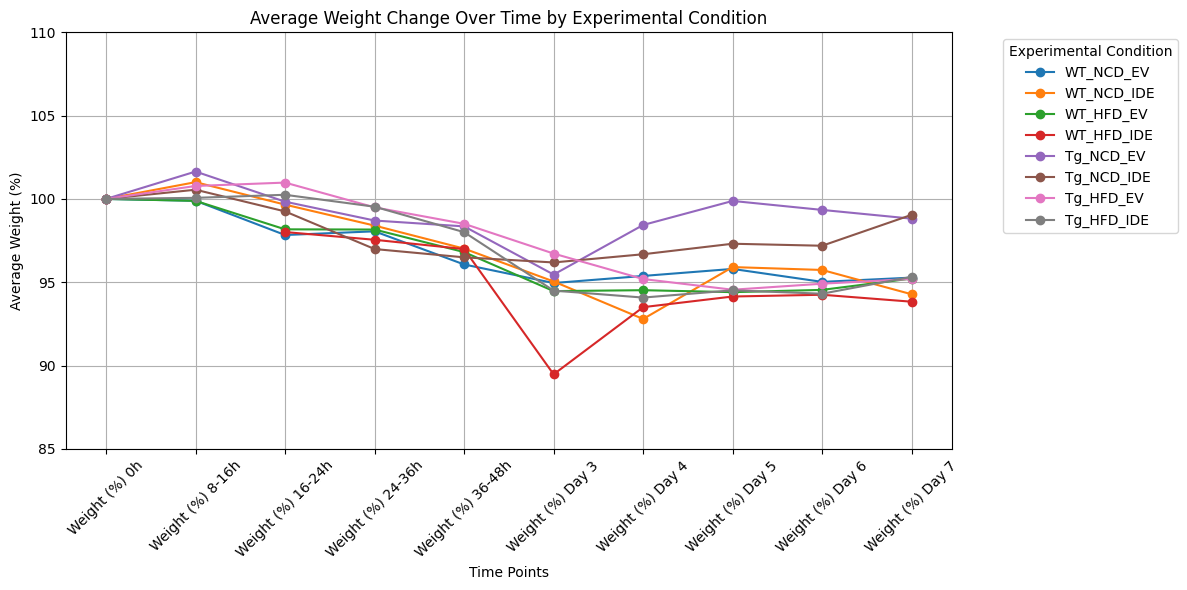

In [20]:
# Compute the average per experimental condition

df_avg = df_filtered.groupby('Experimental Condition')[weight_pct_cols].mean()*100

# Reorder the dataframe based on the desired order
df_avg = df_avg.loc[desired_order]

# Plot the average weight per experimental condition over time
plt.figure(figsize=(12, 6))

for condition in desired_order:
    if condition in df_avg.index:
        plt.plot(df_avg.columns, df_avg.loc[condition], marker='o', label=condition)

plt.xlabel("Time Points")
plt.ylabel("Average Weight (%)")
plt.title("Average Weight Change Over Time by Experimental Condition")
plt.xticks(rotation=45)
plt.ylim(85,110)
plt.legend(title="Experimental Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/Weight progression by experimental condition_oct25.png')

# Show the plot
plt.show()

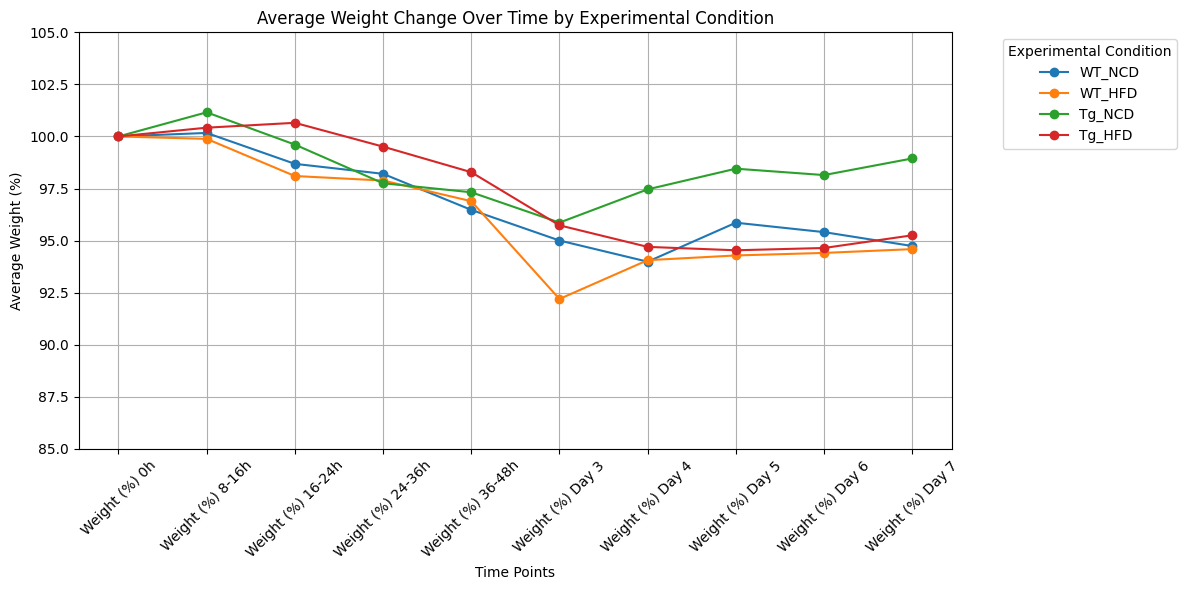

In [21]:
# Compute the average per experimental condition
df_avg = df_filtered.groupby('Experimental Group')[weight_pct_cols].mean()*100

# Reorder the dataframe based on the desired order
df_avg = df_avg.loc[desired_order_group]

# Plot the average weight per experimental condition over time
plt.figure(figsize=(12, 6))

for condition in desired_order_group:
    if condition in df_avg.index:
        plt.plot(df_avg.columns, df_avg.loc[condition], marker='o', label=condition)

plt.xlabel("Time Points")
plt.ylabel("Average Weight (%)")
plt.title("Average Weight Change Over Time by Experimental Condition")
plt.xticks(rotation=45)
plt.ylim(85,105)
plt.legend(title="Experimental Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/Weight progression by experimental group_oct25.png')


# Show the plot
plt.show()

### Weight loss rate

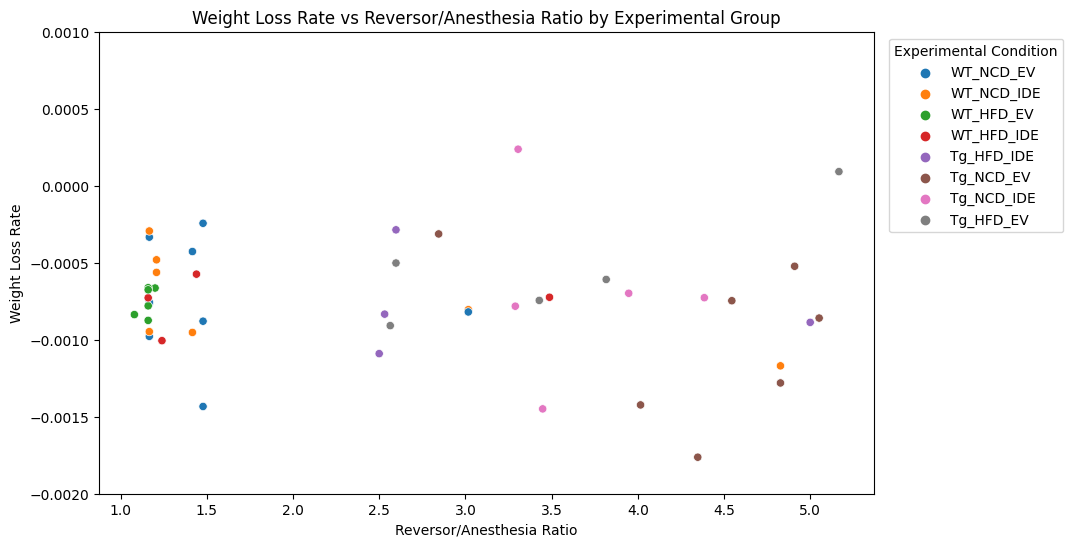

In [25]:
from scipy.stats import linregress

# Define the weight percentage columns and their corresponding time points (in hours)
time_mapping = {
    "Weight (%) 0h": 0,
    "Weight (%) 8-16h": 12,
    "Weight (%) 16-24h": 24,
    "Weight (%) 24-36h": 36,
    "Weight (%) 36-48h": 48,
    "Weight (%) Day 3": 72
}

# Extract only the relevant columns
sorted_weight_timepoints = list(time_mapping.keys())
sorted_time_values = [time_mapping[col] for col in sorted_weight_timepoints]

# Function to calculate weight loss rate per animal
def calculate_slope(row):
    x = np.array(sorted_time_values)  # Time points in hours
    y = row[sorted_weight_timepoints].to_numpy(dtype=np.float64)
    
    # Check for NaN values and ensure at least two valid points exist
    mask = ~np.isnan(y)
    if sum(mask) >= 2:
        slope, _, _, _, _ = linregress(x[mask], y[mask])
        return slope
    return np.nan

# Apply function to calculate weight loss rate
df_filtered["Weight loss rate"] = df_filtered.apply(calculate_slope, axis=1)


# Convert 'Reversor/Anesthesia ratio' to numeric to ensure compatibility
df_filtered["Reversor/Anesthesia ratio"] = pd.to_numeric(df_filtered["Reversor/Anesthesia ratio"], errors='coerce')

# Scatter plot of Weight Loss Rate vs Reversor/Anesthesia ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x="Reversor/Anesthesia ratio",
    y="Weight loss rate",
    hue="Experimental Condition",
    palette="tab10")

plt.xlabel("Reversor/Anesthesia Ratio")
plt.ylabel("Weight Loss Rate")
plt.title("Weight Loss Rate vs Reversor/Anesthesia Ratio by Experimental Group")
plt.ylim(-0.0020,0.0010)
plt.legend(title="Experimental Condition", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/Weight Loss Rate vs Reversor_Anesthesia Ratio by Experimental Condition_oct25.png')
plt.show()

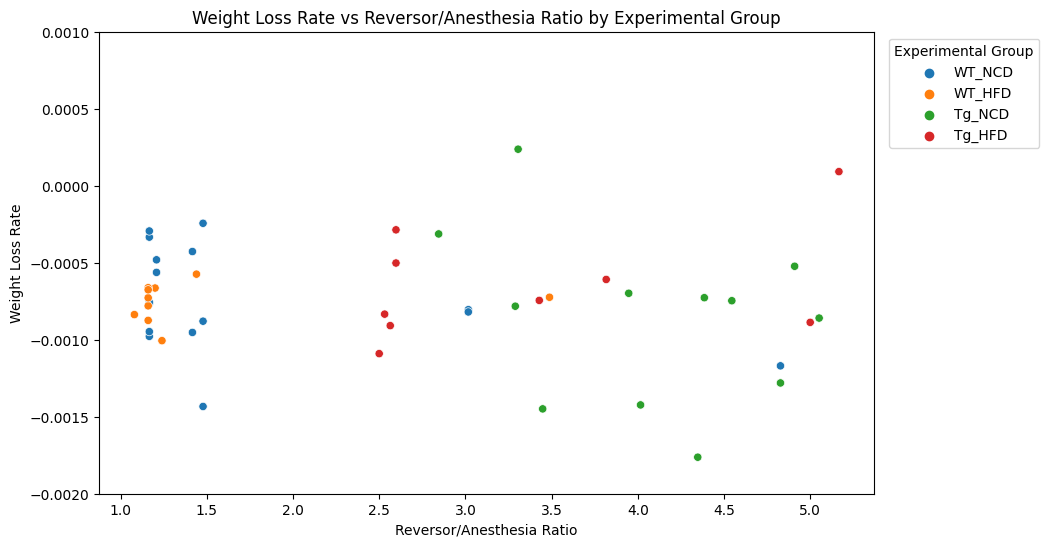

In [26]:
# Scatter plot of Weight Loss Rate vs Reversor/Anesthesia ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x="Reversor/Anesthesia ratio",
    y="Weight loss rate",
    hue="Experimental Group",
    hue_order=desired_order_group,  # Add this line to specify the order
    palette="tab10")
plt.xlabel("Reversor/Anesthesia Ratio")
plt.ylabel("Weight Loss Rate")
plt.title("Weight Loss Rate vs Reversor/Anesthesia Ratio by Experimental Group")
plt.ylim(-0.0020,0.0010)
plt.legend(title="Experimental Group", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig('/Users/louis/Desktop/Louis/PhD/Final data/Surgery/Weight Loss Rate vs Reversor_Anesthesia Ratio by Experimental Group_oct25.png')
plt.show()

### AUC

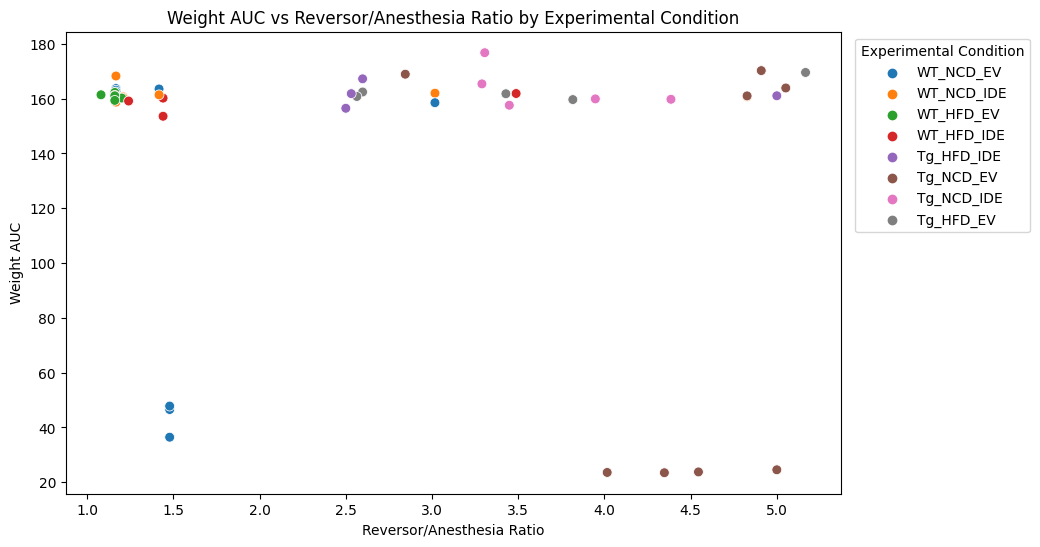

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid  # Updated function name

# Define the weight percentage columns and their corresponding time points (in hours)
time_mapping = {
    "Weight (%) 0h": 0,
    "Weight (%) 8-16h": 12,
    "Weight (%) 16-24h": 24,
    "Weight (%) 24-36h": 36,
    "Weight (%) 36-48h": 48,
    "Weight (%) Day 3": 72,
    "Weight (%) Day 4": 96,
    "Weight (%) Day 5": 120,
    "Weight (%) Day 6": 144,
    "Weight (%) Day 7": 168
}

# Extract only the relevant columns
sorted_weight_timepoints = list(time_mapping.keys())
sorted_time_values = [time_mapping[col] for col in sorted_weight_timepoints]

# Function to calculate AUC for each animal with the updated time points
def calculate_auc(row):
    x = np.array(sorted_time_values)  # Time points in hours
    y = row[sorted_weight_timepoints].to_numpy(dtype=np.float64)
    
    # Check for NaN values and ensure at least two valid points exist
    mask = ~np.isnan(y)
    if sum(mask) >= 2:
        return trapezoid(y[mask], x[mask])  # Compute AUC using trapezoidal rule
    return np.nan

# Apply function to calculate AUC for weight progression
df_filtered["Weight AUC"] = df_filtered.apply(calculate_auc, axis=1)

# Convert 'Reversor/Anesthesia ratio' to numeric to ensure compatibility
df_filtered["Reversor/Anesthesia ratio"] = pd.to_numeric(df_filtered["Reversor/Anesthesia ratio"], errors='coerce')

# Scatter plot of Weight AUC vs Reversor/Anesthesia ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x="Reversor/Anesthesia ratio",
    y="Weight AUC",
    hue="Experimental Condition",
    palette="tab10",
    style="Experimental Condition",
    markers={"WT_NCD_EV": "o", "WT_NCD_IDE": "o", "WT_HFD_EV": "o", "WT_HFD_IDE": "o",
             "Tg_NCD_EV": "o", "Tg_NCD_IDE": "o", "Tg_HFD_EV": "o", "Tg_HFD_IDE": "o"},  # All markers set to 'o' (round)
    s=50  # Marker size to make them appear as "balls"
)

plt.xlabel("Reversor/Anesthesia Ratio")
plt.ylabel("Weight AUC")
plt.title("Weight AUC vs Reversor/Anesthesia Ratio by Experimental Condition")
plt.legend(title="Experimental Condition", bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()

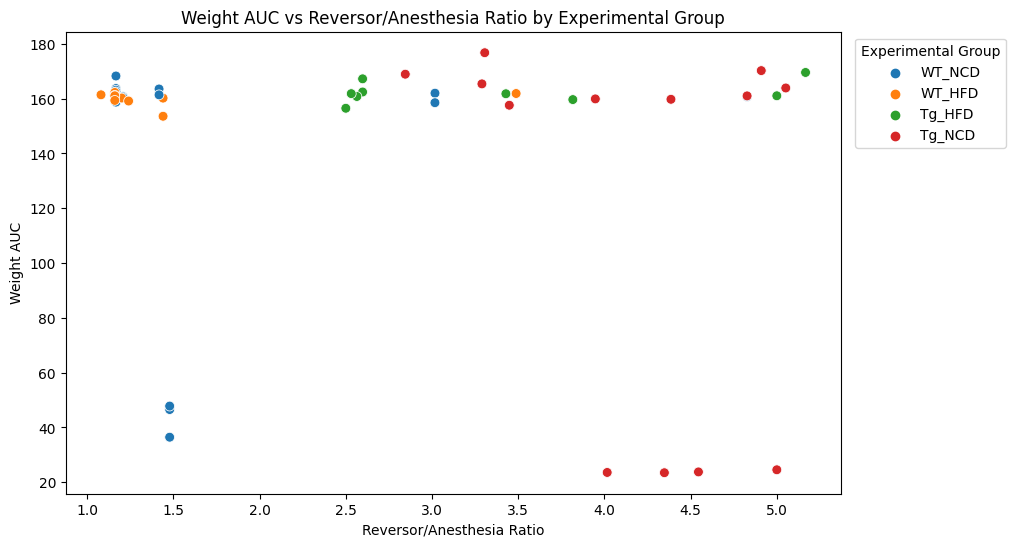

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid  # Updated function name

# Define the weight percentage columns and their corresponding time points (in hours)
time_mapping = {
    "Weight (%) 0h": 0,
    "Weight (%) 8-16h": 12,
    "Weight (%) 16-24h": 24,
    "Weight (%) 24-36h": 36,
    "Weight (%) 36-48h": 48,
    "Weight (%) Day 3": 72,
    "Weight (%) Day 4": 96,
    "Weight (%) Day 5": 120,
    "Weight (%) Day 6": 144,
    "Weight (%) Day 7": 168
}

# Extract only the relevant columns
sorted_weight_timepoints = list(time_mapping.keys())
sorted_time_values = [time_mapping[col] for col in sorted_weight_timepoints]

# Function to calculate AUC for each animal with the updated time points
def calculate_auc(row):
    x = np.array(sorted_time_values)  # Time points in hours
    y = row[sorted_weight_timepoints].to_numpy(dtype=np.float64)
    
    # Check for NaN values and ensure at least two valid points exist
    mask = ~np.isnan(y)
    if sum(mask) >= 2:
        return trapezoid(y[mask], x[mask])  # Compute AUC using trapezoidal rule
    return np.nan

# Apply function to calculate AUC for weight progression
df_filtered["Weight AUC"] = df_filtered.apply(calculate_auc, axis=1)

# Convert 'Reversor/Anesthesia ratio' to numeric to ensure compatibility
df_filtered["Reversor/Anesthesia ratio"] = pd.to_numeric(df_filtered["Reversor/Anesthesia ratio"], errors='coerce')

# Scatter plot of Weight AUC vs Reversor/Anesthesia ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x="Reversor/Anesthesia ratio",
    y="Weight AUC",
    hue="Experimental Group",
    palette="tab10",
    style="Experimental Group",
    markers={"WT_NCD":"o", "WT_HFD": "o",
             "Tg_NCD": "o", "Tg_HFD":"o"},  # All markers set to 'o' (round)
    s=50  # Marker size to make them appear as "balls"
)

plt.xlabel("Reversor/Anesthesia Ratio")
plt.ylabel("Weight AUC")
plt.title("Weight AUC vs Reversor/Anesthesia Ratio by Experimental Group")
plt.legend(title="Experimental Group", bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()

### Correlation assessment

#### Weight loss rate vs Reversor/Anesthesia ratio

In [29]:
import numpy as np
import pandas as pd
from scipy.integrate import trapezoid
from scipy.stats import shapiro, pearsonr, spearmanr

# Define the weight percentage columns and their corresponding time points (in hours)
time_mapping = {
    "Weight (%) 0h": 0,
    "Weight (%) 8-16h": 12,
    "Weight (%) 16-24h": 24,
    "Weight (%) 24-36h": 36,
    "Weight (%) 36-48h": 48,
    "Weight (%) Day 3": 72,
    "Weight (%) Day 4": 96,
    "Weight (%) Day 5": 120,
    "Weight (%) Day 6": 144,
    "Weight (%) Day 7": 168
}

# Extract relevant columns
sorted_weight_timepoints = list(time_mapping.keys())
sorted_time_values = [time_mapping[col] for col in sorted_weight_timepoints]

# Function to calculate AUC for each animal
def calculate_auc(row):
    x = np.array(sorted_time_values)  # Time points in hours
    y = row[sorted_weight_timepoints].to_numpy(dtype=np.float64)
    
    # Check for NaN values and ensure at least two valid points exist
    mask = ~np.isnan(y)
    if sum(mask) >= 2:
        return trapezoid(y[mask], x[mask])  # Compute AUC using trapezoidal rule
    return np.nan

# Apply function to calculate AUC for weight progression
df_filtered["Weight AUC"] = df_filtered.apply(calculate_auc, axis=1)

# Convert 'Reversor/Anesthesia ratio' to numeric to ensure compatibility
df_filtered["Reversor/Anesthesia ratio"] = pd.to_numeric(df_filtered["Reversor/Anesthesia ratio"], errors='coerce')

# Drop NaN values in the relevant columns before correlation analysis
df_clean = df_filtered.dropna(subset=["Reversor/Anesthesia ratio", "Weight AUC"])


# Check normality for each group and calculate correlation for Weight AUC
correlation_results = []

for group in desired_order:
    subset = df_clean[df_clean["Experimental Condition"] == group]
    
    if len(subset) >= 3:
        # Check normality using Shapiro-Wilk test
        stat_auc, p_auc = shapiro(subset["Weight AUC"].dropna())
        stat_rar, p_rar = shapiro(subset["Reversor/Anesthesia ratio"].dropna())
        
        # Choose Pearson if normal, otherwise Spearman
        if p_auc > 0.05 and p_rar > 0.05:
            corr_coef, p_value = pearsonr(subset["Reversor/Anesthesia ratio"], subset["Weight AUC"])
            method = "Pearson"
        else:
            corr_coef, p_value = spearmanr(subset["Reversor/Anesthesia ratio"], subset["Weight AUC"])
            method = "Spearman"
        
        correlation_results.append({
            "Experimental Condition": group,
            "Method": method,
            "Correlation Coefficient": corr_coef,
            "P-value": p_value
        })
    else:
        correlation_results.append({
            "Experimental Condition": group,
            "Method": "N/A",
            "Correlation Coefficient": np.nan,
            "P-value": np.nan
        })

# Convert results into a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Display correlation results
correlation_df

,Experimental Condition,Method,Correlation Coefficient,P-value
0,WT_NCD_EV,Spearman,-0.700460,0.035596
1,WT_NCD_IDE,Spearman,0.236403,0.609790
2,WT_HFD_EV,Spearman,-0.338062,0.512225
3,WT_HFD_IDE,Spearman,0.205196,0.740582
4,Tg_NCD_EV,Spearman,0.309524,0.455645
5,Tg_NCD_IDE,Pearson,-0.533941,0.354014
6,Tg_HFD_EV,Pearson,0.753152,0.141647
7,Tg_HFD_IDE,Spearman,0.400000,0.600000


#### AUC vs Reversor/Anesthesia ratio

In [30]:

# Define the weight percentage columns and their corresponding time points (in hours)
time_mapping = {
    "Weight (%) 0h": 0,
    "Weight (%) 8-16h": 12,
    "Weight (%) 16-24h": 24,
    "Weight (%) 24-36h": 36,
    "Weight (%) 36-48h": 48,
    "Weight (%) Day 3": 72,
    "Weight (%) Day 4": 96,
    "Weight (%) Day 5": 120,
    "Weight (%) Day 6": 144,
    "Weight (%) Day 7": 168
}

# Extract relevant columns
sorted_weight_timepoints = list(time_mapping.keys())
sorted_time_values = [time_mapping[col] for col in sorted_weight_timepoints]

# Function to calculate AUC for each animal
def calculate_auc(row):
    x = np.array(sorted_time_values)  # Time points in hours
    y = row[sorted_weight_timepoints].to_numpy(dtype=np.float64)
    
    # Check for NaN values and ensure at least two valid points exist
    mask = ~np.isnan(y)
    if sum(mask) >= 2:
        return trapezoid(y[mask], x[mask])  # Compute AUC using trapezoidal rule
    return np.nan

# Apply function to calculate AUC for weight progression
df_filtered["Weight AUC"] = df_filtered.apply(calculate_auc, axis=1)

# Convert 'Reversor/Anesthesia ratio' to numeric to ensure compatibility
df_filtered["Reversor/Anesthesia ratio"] = pd.to_numeric(df_filtered["Reversor/Anesthesia ratio"], errors='coerce')

# Drop NaN values in the relevant columns before correlation analysis
df_clean = df_filtered.dropna(subset=["Reversor/Anesthesia ratio", "Weight AUC"])


# Check normality for each group and calculate correlation for Weight AUC
correlation_results = []

for group in desired_order_group:
    subset = df_clean[df_clean["Experimental Group"] == group]
    
    if len(subset) >= 3:
        # Check normality using Shapiro-Wilk test
        stat_auc, p_auc = shapiro(subset["Weight AUC"].dropna())
        stat_rar, p_rar = shapiro(subset["Reversor/Anesthesia ratio"].dropna())
        
        # Choose Pearson if normal, otherwise Spearman
        if p_auc > 0.05 and p_rar > 0.05:
            corr_coef, p_value = pearsonr(subset["Reversor/Anesthesia ratio"], subset["Weight AUC"])
            method = "Pearson"
        else:
            corr_coef, p_value = spearmanr(subset["Reversor/Anesthesia ratio"], subset["Weight AUC"])
            method = "Spearman"
        
        correlation_results.append({
            "Experimental Group": group,
            "Method": method,
            "Correlation Coefficient": corr_coef,
            "P-value": p_value
        })
    else:
        correlation_results.append({
            "Experimental Group": group,
            "Method": "N/A",
            "Correlation Coefficient": np.nan,
            "P-value": np.nan
        })

# Convert results into a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Display correlation results
correlation_df

,Experimental Group,Method,Correlation Coefficient,P-value
0,WT_NCD,Spearman,-0.436906,0.090619
1,WT_HFD,Spearman,-0.339329,0.307308
2,Tg_NCD,Spearman,-0.225275,0.459305
3,Tg_HFD,Spearman,0.359836,0.341509
